# Packages load

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and direc

In [3]:
!pip install autogluon # automl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.5/427.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 776.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [3]:
!pip install pytorch-tabnet

  Using cached pytorch_tabnet-4.1.0-py3-none-any.whl (44 kB)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

from autogluon.tabular import TabularPredictor
from autogluon.core.metrics import make_scorer

from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

In [5]:
# seed 고정
import os
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

# Data load

In [6]:
path = '/content/drive/MyDrive/Colab Notebooks/대구 교통사고 피해 예측 AI 경진대회/data/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
sample_submission = pd.read_csv(path+'sample_submission.csv')

In [7]:
# 동별 보안등 수(행정동)
light_df = pd.read_csv(path+'대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])
light_df.loc[light_df['동'] == '옥포면', '동']= '옥포읍'
light_df.loc[light_df['동'] == '유가면', '동']= '유가읍'
light_df.loc[light_df['동'] == '현풍면', '동']= '현풍읍'
light_df.loc[light_df['동'] == '입석로', '동']= '입석동'
light_df.loc[light_df['동'] == '대현1동', '동']= '대현동'
light_df.loc[light_df['동'] == '대현2동', '동']= '대현동'
light_df.loc[light_df['동'] == '내당2·3동', '동']= '내당2.3동'
light_df.loc[light_df['동'] == '비산2·3동', '동']= '비산2.3동'
light_df.loc[light_df['동'] == '동성로', '동']= '동성로2가' # 동성로라는 행정동, 법정동 자체가 없지만 데이터가 가장 많은 동성로2가로 대체

light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
light_df.reset_index(inplace=True, drop=True)
light_df.head()

<ipython-input-7-ba7a619eae98>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  light_df = pd.read_csv(path+'대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]


,도시,구,동,설치개수
0,대구광역시,남구,대명동,5377
1,대구광역시,남구,봉덕동,1424
2,대구광역시,남구,이천동,556
3,대구광역시,달서구,갈산동,349
4,대구광역시,달서구,감삼동,932


In [8]:
# 동별 주차장 수
parking_df = pd.read_csv(path+'대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df.loc[parking_df['동'] == '옥포면', '동']= '옥포읍'
parking_df.loc[parking_df['동'] == '현풍면', '동']= '현풍읍'
parking_df.loc[parking_df['동'] == '내당4동', '동']= '내당동'

parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)
parking_df.head()

,도시,구,동,급지구분_1,급지구분_2,급지구분_3
0,대구광역시,남구,대명동,20,1,0
1,대구광역시,남구,봉덕동,9,3,0
2,대구광역시,남구,이천동,3,0,0
3,대구광역시,달서구,갈산동,0,0,4
4,대구광역시,달서구,감삼동,0,1,3


In [9]:
# 동별 어린이 보호구역 수
child_area_df = pd.read_csv(path+'대구 어린이 보호 구역 정보.csv', encoding='cp949').drop_duplicates()[['소재지지번주소']]
child_area_df['child_area_count'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)

child_area_df.loc[child_area_df['동'] == '옥포면', '동']= '옥포읍'
child_area_df.loc[child_area_df['동'] == '현풍면', '동']= '현풍읍'
child_area_df.head()

,도시,구,동,child_area_count
0,대구광역시,남구,대명동,26
1,대구광역시,남구,봉덕동,8
2,대구광역시,남구,이천동,6
3,대구광역시,달성군,가창면,4
4,대구광역시,달성군,구지면,3


In [10]:
# 동별 교통사고다발구역
accident_place = pd.read_csv(path+'도로교통공단_교통사고다발지역_20230125.csv', encoding = 'cp949')
accident = accident_place[accident_place['사고지역위치명'].str.contains("대구광역시")]
accident = accident[(accident['사고연도'] <= 2021) & (accident['사고연도'] >= 2019 )]

accident['사고지역위치명'] = accident['사고지역위치명'].str.replace(r"\(.*\)","", regex=True)

location_pattern = r'(\S+) (\S+) (\S+)'

accident[['도시', '구', '동']] = accident['사고지역위치명'].str.extract(location_pattern)

accident = accident.drop(columns=['사고지역위치명'])

accident['accident_count'] = 1

accident = accident.groupby(['사고연도','도시', '구', '동'], as_index=False).sum(numeric_only=False)
accident = accident[['사고연도','도시', '구', '동', 'accident_count','사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']]
accident = accident.rename(columns = {'사고연도':'연', '사망자수':'사망','중상자수':'중상', '경상자수':'경상', '부상신고자수':'부상'})
accident.head()

,연,도시,구,동,accident_count,사고건수,사망,중상,경상,부상
0,2019,대구광역시,남구,대명동,6,23,2,13,7,4
1,2019,대구광역시,남구,봉덕동,3,12,1,8,2,1
2,2019,대구광역시,달서구,감삼동,4,19,1,6,9,4
3,2019,대구광역시,달서구,대천동,1,4,0,0,3,1
4,2019,대구광역시,달서구,두류동,2,12,0,3,5,4


In [11]:
# 동별 CCTV 정보
CCTV_df = pd.read_csv(path+'대구 CCTV 정보.csv', encoding='cp949')[['소재지지번주소', '단속구분']]
CCTV_df = pd.get_dummies(CCTV_df, columns=['단속구분'])


location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

CCTV_df[['도시', '구', '동', '번지']] = CCTV_df['소재지지번주소'].str.extract(location_pattern)
CCTV_df['도시'] = '대구광역시' # 도시명 대구광역시로 통일
CCTV_df = CCTV_df.drop(columns=['소재지지번주소', '번지'])

CCTV_df = CCTV_df.groupby(['도시', '구', '동']).sum().reset_index()
CCTV_df.reset_index(inplace=True, drop=True)

CCTV_df.head()

,도시,구,동,단속구분_1,단속구분_2,단속구분_4,단속구분_99
0,대구광역시,가창면,삼산리,1,0,0,0
1,대구광역시,군위군,군위읍,1,2,0,0
2,대구광역시,군위군,부계면,2,2,0,0
3,대구광역시,군위군,삼국유사면,0,1,0,0
4,대구광역시,군위군,소보면,2,0,0,1


In [12]:
# 구 별 인구정보
pop_df = pd.read_csv(path+'대구광역시_주민등록인구 통계현황.csv', encoding='cp949')[['행정구역','2021년05월_총인구수']]

location_pattern = r'(\S+) (\S+) (\S+)'

pop_df[['도시', '구', '괄호']] = pop_df['행정구역'].str.extract(location_pattern)

pop_df = pop_df[['구','2021년05월_총인구수']]
pop_df.head()

,구,2021년05월_총인구수
0,NaN,2402940
1,중구,75133
2,동구,341730
3,서구,168704
4,남구,146066


In [13]:
### 장애인보호시설
disabled = pd.read_csv(path+'대구광역시_장애인주간보호시설현황_20201231.csv', encoding = 'cp949')
disabled['장애인보호시설개수'] = 1
disabled['구'] = disabled['소재지'].map(lambda x: x.split( )[0] )
disabled=disabled.groupby(['구']).agg(sum).reset_index()
disabled = disabled[['구','정원','장애인보호시설개수']]

### 응급의료기관
emer = pd.read_csv(path+'대구광역시응급의료기관현황(2019년 1월).csv', encoding = 'cp949')
emer['동'] = emer['세부주소'].str.extract(r'\((.*?)\)')
emer['동'].value_counts()
emer['응급의료센터개수']=1
emer=emer.groupby(['동']).agg(sum).reset_index()
emer = emer[['동','응급의료센터개수']]

### 지역경찰
police = pd.read_csv(path+'경찰청 대구광역시경찰청_관서별 지역경찰 현황_20221231.csv', encoding = 'cp949')
police['구'] = police['주소'].map(lambda x: x.split(' ')[1])
police['지구대파출소개수']=1
police=police.groupby(['구']).sum().reset_index()
police = police[['구','지구대파출소개수']]

### 경로당
elder = pd.read_csv(path+'경로당현황_20211110.csv', encoding='cp949')
for i in range(elder.shape[0]):
    juso=elder.iloc[i]['주소'].split(' ')
    if juso[0]=='대구광역시':
        elder.iloc[i,-2] =juso[1]
    else:
        elder.iloc[i,-2] = juso[0]
elder['경로당개수']=1
elder.rename(columns = {'주소' : '구'}, inplace = True)
elder=elder.groupby(['구']).sum().reset_index()
elder = elder[['구','경로당개수']]

###노인복지
elder_serve = pd.read_csv(path+'대구광역시_노인요양시설_20210930_수정.csv', encoding='cp949')
elder_serve['요양시설개수'] = 1
elder_serve.rename(columns = {'구분' : '구'}, inplace = True)
elder_serve = elder_serve.groupby(['구']).agg(sum).reset_index()
elder_serve = elder_serve[['구','입소정원','요양시설개수']]

# EDA 및 시각화 *- preprocessing 파트 적용 후 실행*

In [52]:
train_df

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,도시,구,동,도로형태1,도로형태2,time_cat,설치개수,child_area_count,급지구분_1,급지구분_2,급지구분_3,정원,장애인보호시설개수,응급의료센터개수,지구대파출소개수,경로당개수,입소정원,요양시설개수
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,대구광역시,중구,대신동,단일로,기타,심야,391.0,2.0,11.0,0.0,0.0,69,5,NaN,4,48,191,6
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,대구광역시,달서구,감삼동,단일로,기타,심야,932.0,NaN,0.0,1.0,3.0,149,10,1.0,13,274,1216,38
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,대구광역시,수성구,두산동,단일로,기타,심야,473.0,5.0,NaN,NaN,NaN,132,8,NaN,7,247,481,16
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,대구광역시,북구,복현동,단일로,기타,심야,597.0,11.0,0.0,9.0,5.0,125,7,NaN,8,275,1843,61
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,대구광역시,동구,신암동,단일로,기타,심야,2058.0,NaN,0.0,1.0,0.0,143,8,NaN,9,213,1451,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3,2021,12,31,대구광역시,수성구,수성동3가,교차로,교차로안,오후,245.5,1.0,NaN,NaN,NaN,132,8,NaN,7,247,481,16
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3,2021,12,31,대구광역시,달서구,상인동,단일로,기타,오후,843.0,NaN,0.0,0.0,5.0,149,10,NaN,13,274,1216,38
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10,2021,12,31,대구광역시,달서구,월성동,교차로,교차로안,심야,164.0,NaN,0.0,1.0,0.0,149,10,NaN,13,274,1216,38
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3,2021,12,31,대구광역시,달서구,장동,기타,기타,심야,210.0,NaN,0.0,0.0,1.0,149,10,NaN,13,274,1216,38


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                39609 non-null  object 
 1   요일                39609 non-null  object 
 2   기상상태              39609 non-null  object 
 3   노면상태              39609 non-null  object 
 4   사고유형              39609 non-null  object 
 5   사고유형 - 세부분류       39609 non-null  object 
 6   법규위반              39609 non-null  object 
 7   가해운전자 차종          39609 non-null  object 
 8   가해운전자 성별          39609 non-null  object 
 9   가해운전자 연령          39609 non-null  object 
 10  가해운전자 상해정도        39609 non-null  object 
 11  피해운전자 차종          38618 non-null  object 
 12  피해운전자 성별          38618 non-null  object 
 13  피해운전자 연령          38618 non-null  object 
 14  피해운전자 상해정도        38618 non-null  object 
 15  사망자수              39609 non-null  int64  
 16  중상자수              39609 non-null  int64 

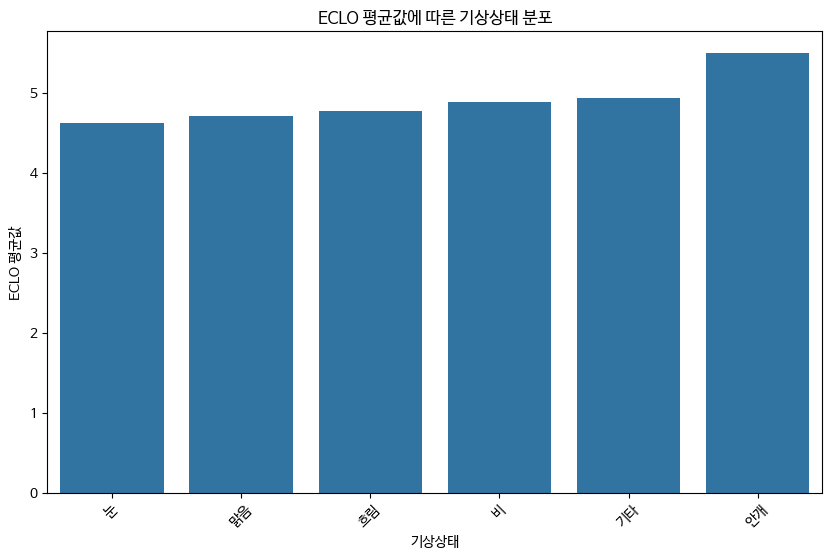

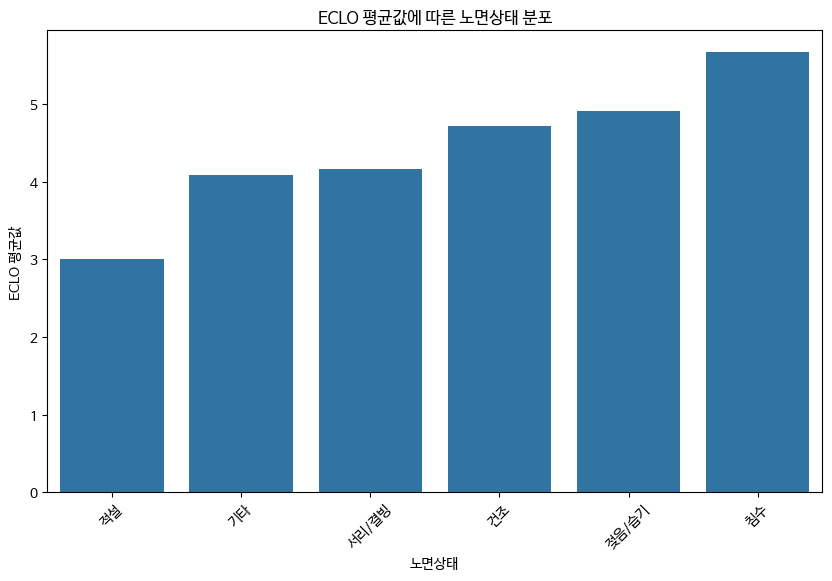

In [54]:
condition = ['기상상태', '노면상태']
for column in condition:
    plt.figure(figsize = (10,6))
    data_grouped = train_df.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-55-5ea91de3360c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='월',y='ECLO', ci = None)
<ipython-input-55-5ea91de3360c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='월',y='ECLO', ci = None)
<ipython-input-55-5ea91de3360c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='월',y='ECLO', ci = None)


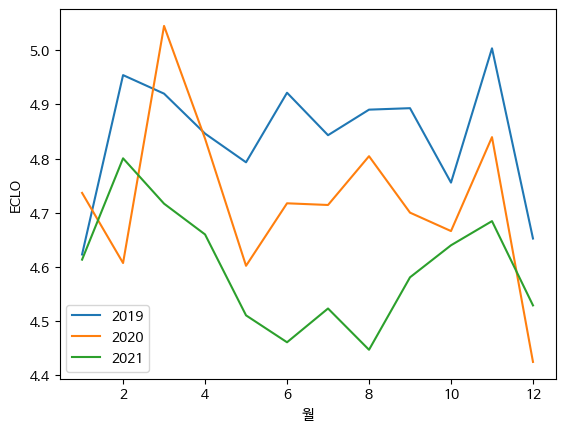

In [55]:
le=[]
for year in range(2019,2022):
    data =train_df.loc[train_df['연']==year]
    sns.lineplot(data=data, x='월',y='ECLO', ci = None)
    le.append(year)
plt.legend(le)

In [71]:
train_df

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,도시,구,동,도로형태1,도로형태2,time_cat,설치개수,child_area_count,급지구분_1,급지구분_2,급지구분_3,정원,장애인보호시설개수,응급의료센터개수,지구대파출소개수,경로당개수,입소정원,요양시설개수
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,대구광역시,중구,대신동,단일로,기타,심야,391.0,2.0,11.0,0.0,0.0,69,5,NaN,4,48,191,6
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,대구광역시,달서구,감삼동,단일로,기타,심야,932.0,NaN,0.0,1.0,3.0,149,10,1.0,13,274,1216,38
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,대구광역시,수성구,두산동,단일로,기타,심야,473.0,5.0,NaN,NaN,NaN,132,8,NaN,7,247,481,16
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,대구광역시,북구,복현동,단일로,기타,심야,597.0,11.0,0.0,9.0,5.0,125,7,NaN,8,275,1843,61
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,대구광역시,동구,신암동,단일로,기타,심야,2058.0,NaN,0.0,1.0,0.0,143,8,NaN,9,213,1451,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3,2021,12,31,대구광역시,수성구,수성동3가,교차로,교차로안,오후,245.5,1.0,NaN,NaN,NaN,132,8,NaN,7,247,481,16
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3,2021,12,31,대구광역시,달서구,상인동,단일로,기타,오후,843.0,NaN,0.0,0.0,5.0,149,10,NaN,13,274,1216,38
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10,2021,12,31,대구광역시,달서구,월성동,교차로,교차로안,심야,164.0,NaN,0.0,1.0,0.0,149,10,NaN,13,274,1216,38
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3,2021,12,31,대구광역시,달서구,장동,기타,기타,심야,210.0,NaN,0.0,0.0,1.0,149,10,NaN,13,274,1216,38


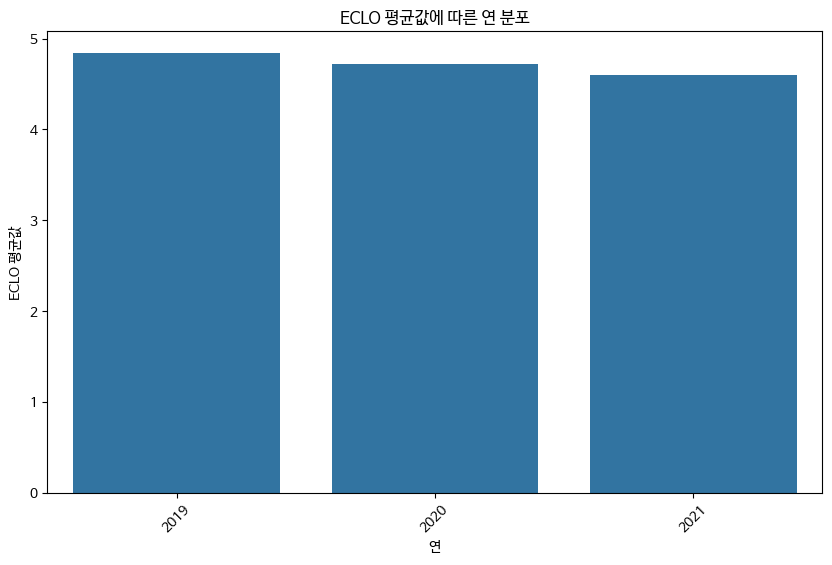

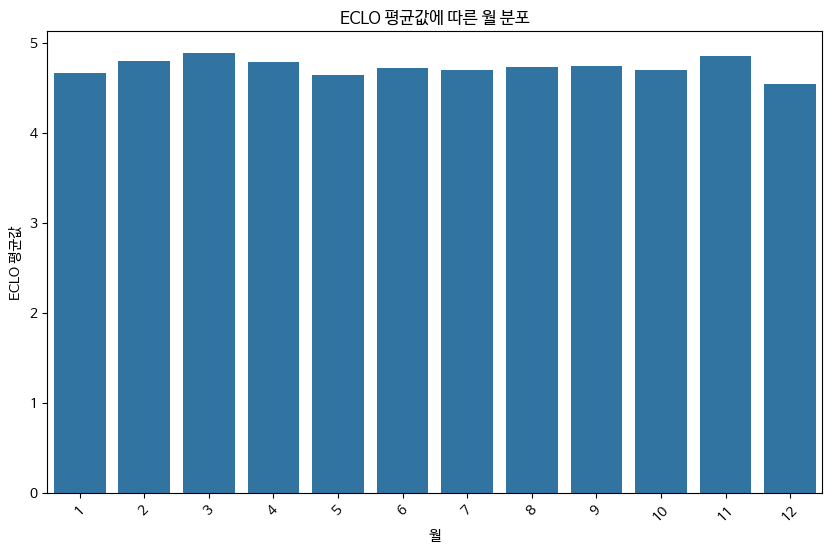

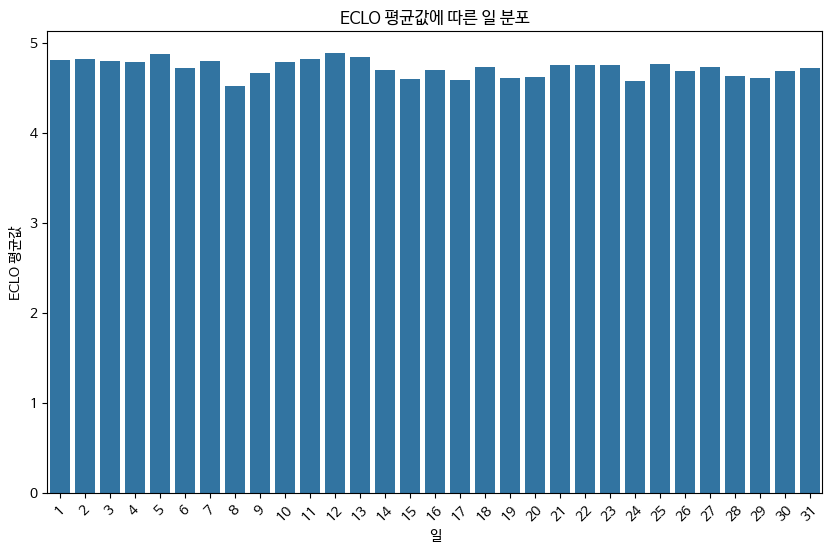

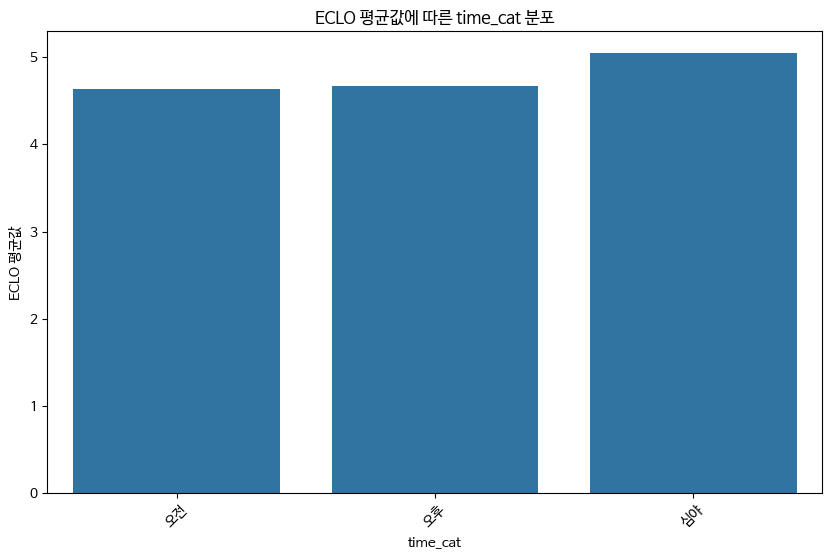

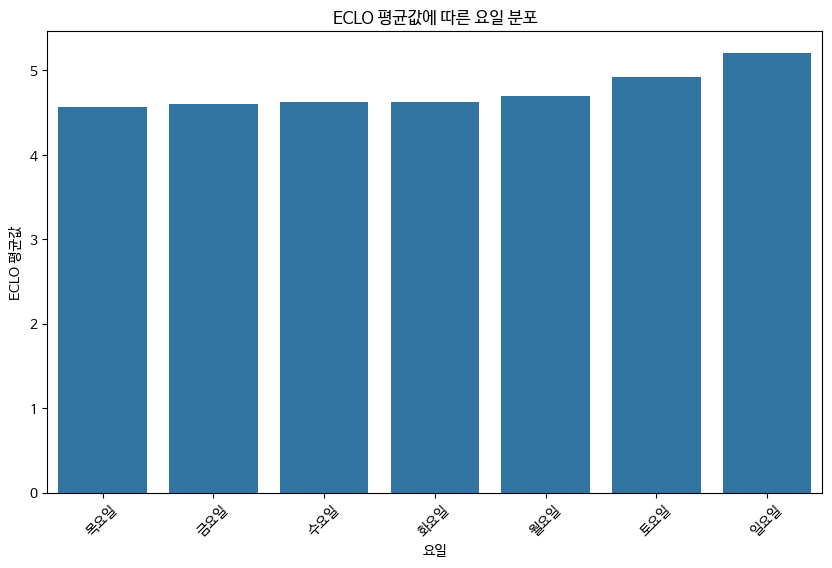

In [72]:
time = ['연', '월', '일', 'time_cat','요일']
for column in time:
    plt.figure(figsize = (10,6))
    data_grouped = train_df.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

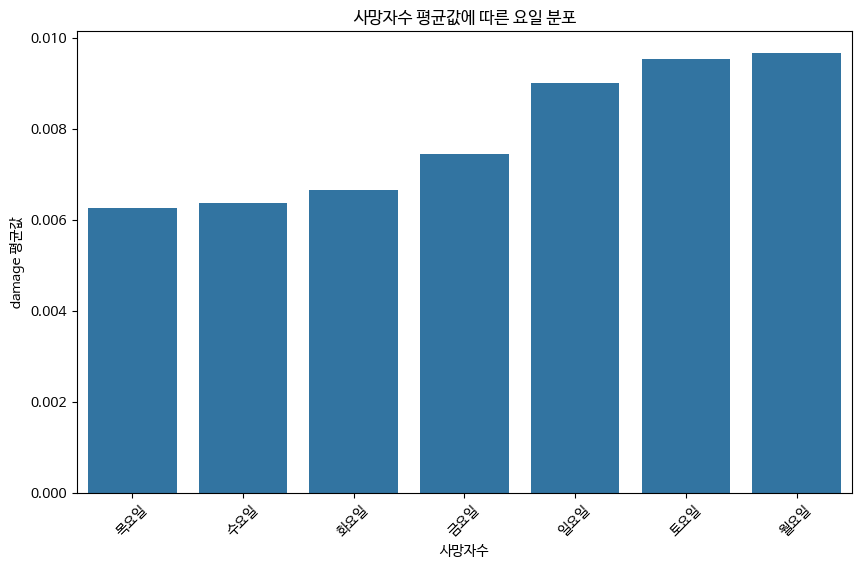

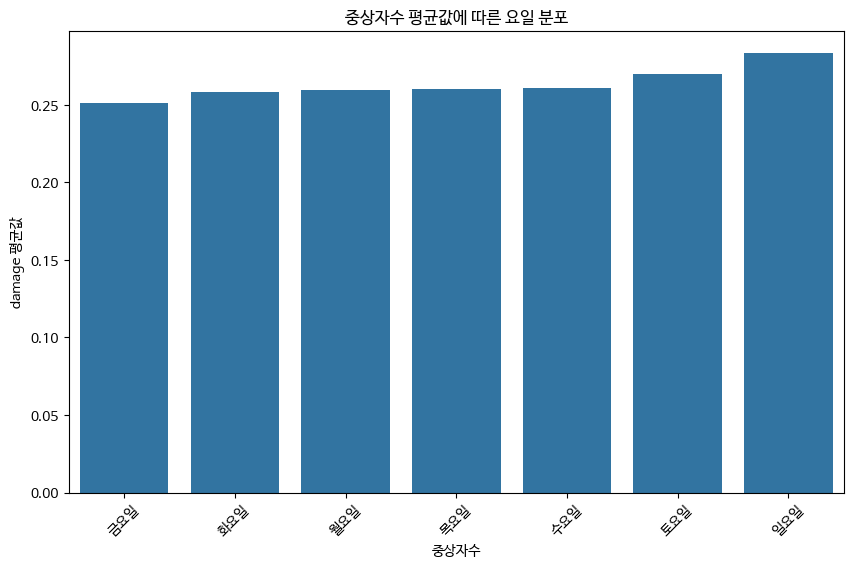

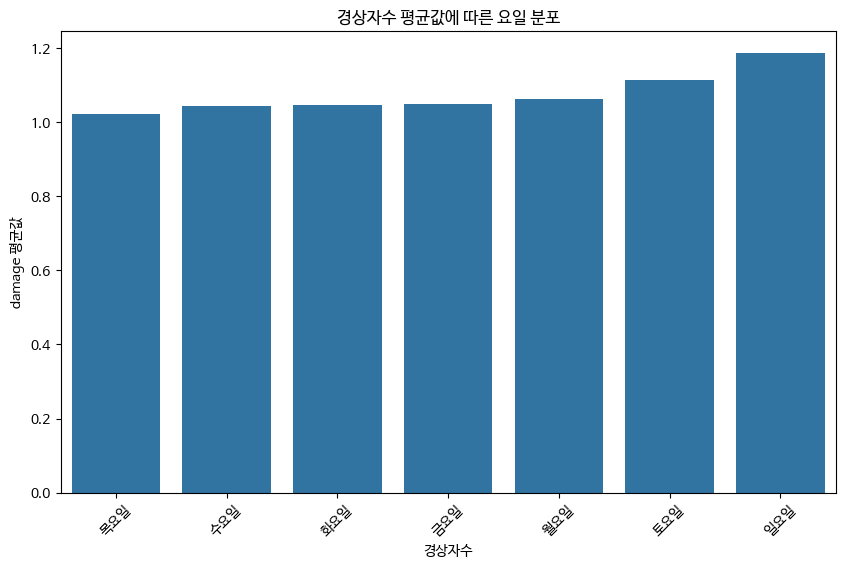

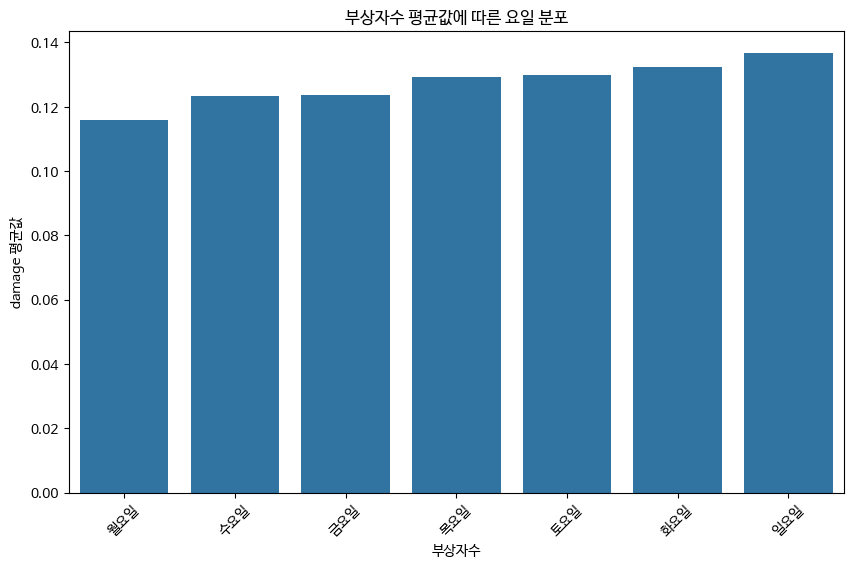

In [73]:
damage = ['사망자수', '중상자수', '경상자수', '부상자수']
for column in damage:
    plt.figure(figsize = (10,6))
    data_grouped = train_df.groupby('요일')[column].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"{column} 평균값에 따른 요일 분포")
    plt.ylabel("damage 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

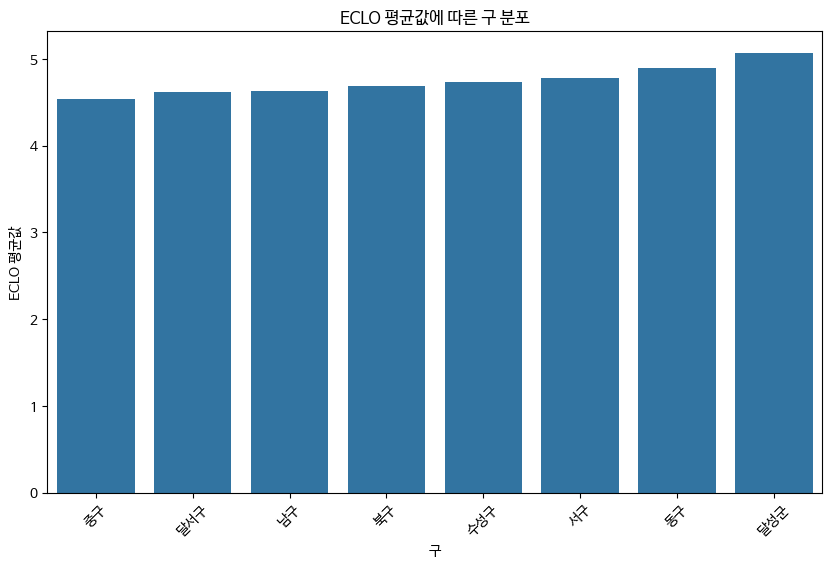

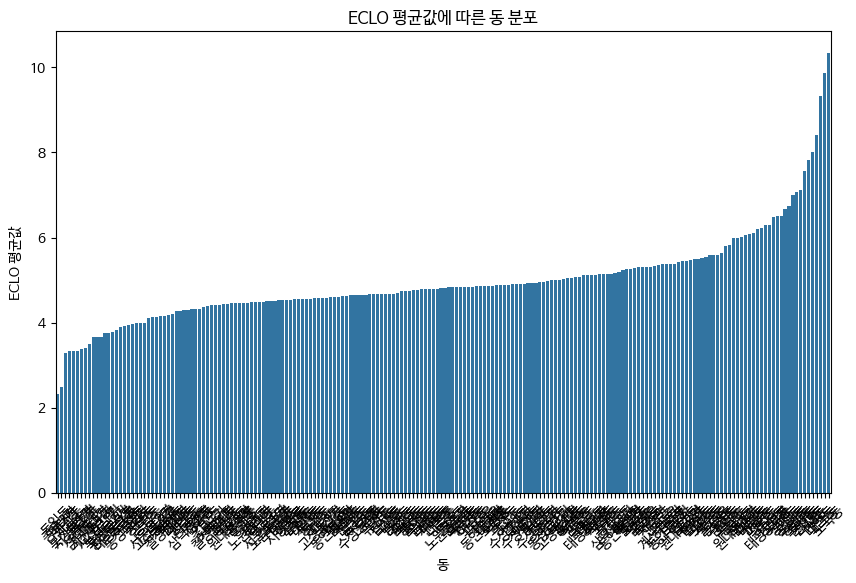

In [74]:
place = ['구', '동']
for column in place:
    plt.rc('xtick', labelsize=10)
    plt.figure(figsize = (10,6))
    data_grouped = train_df.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)

    plt.show()

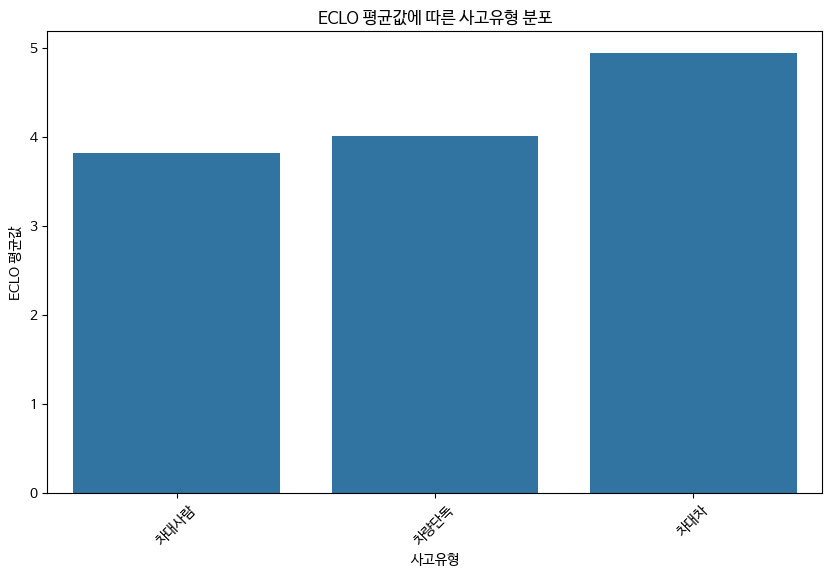

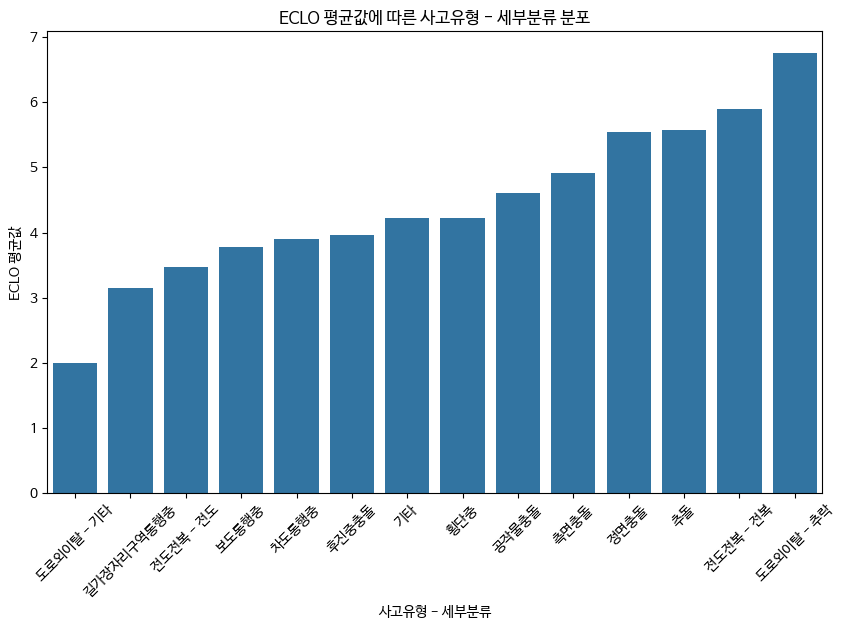

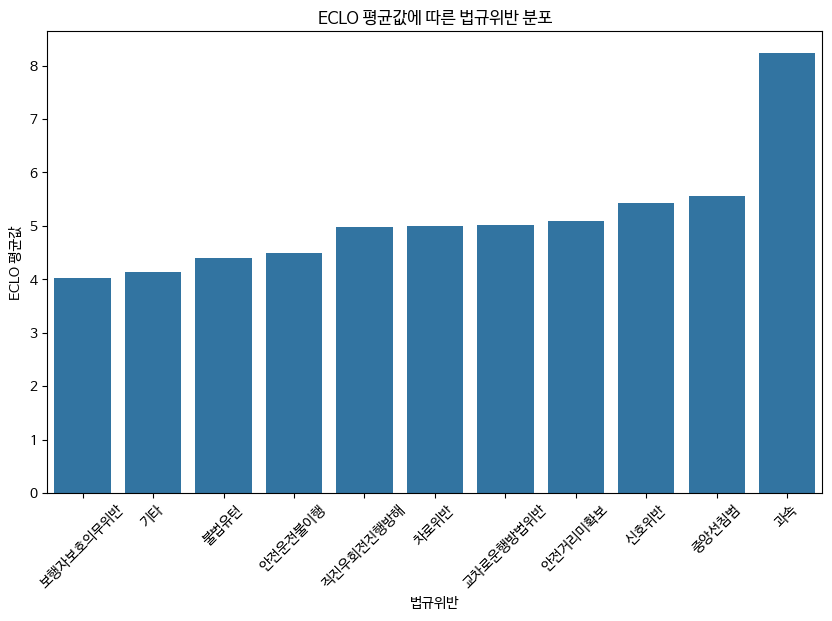

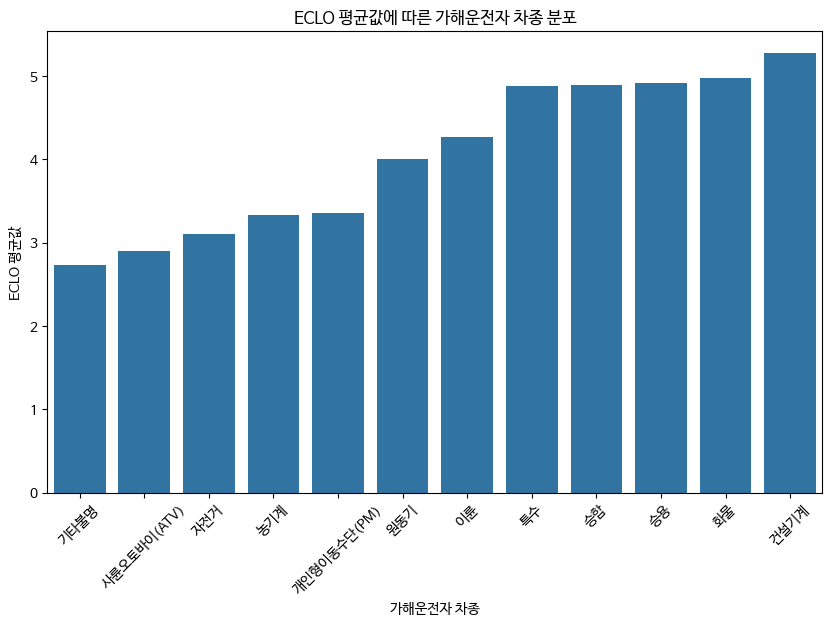

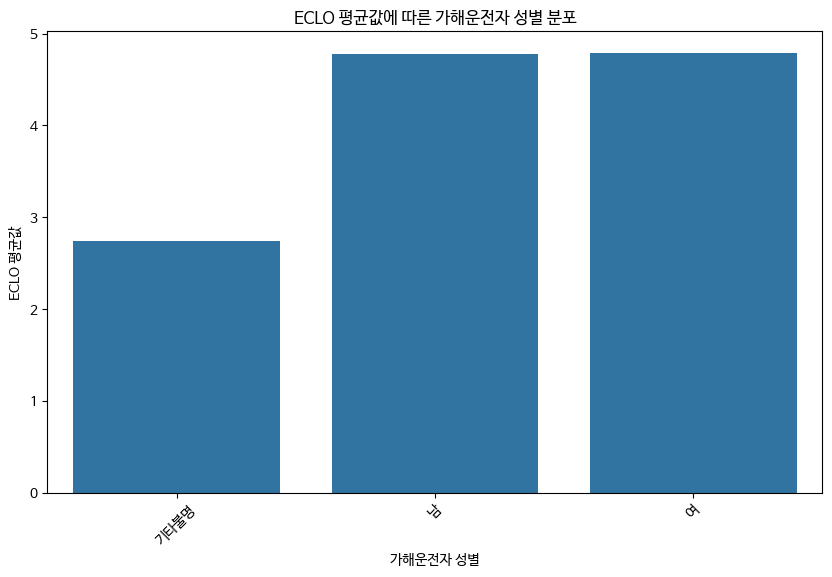

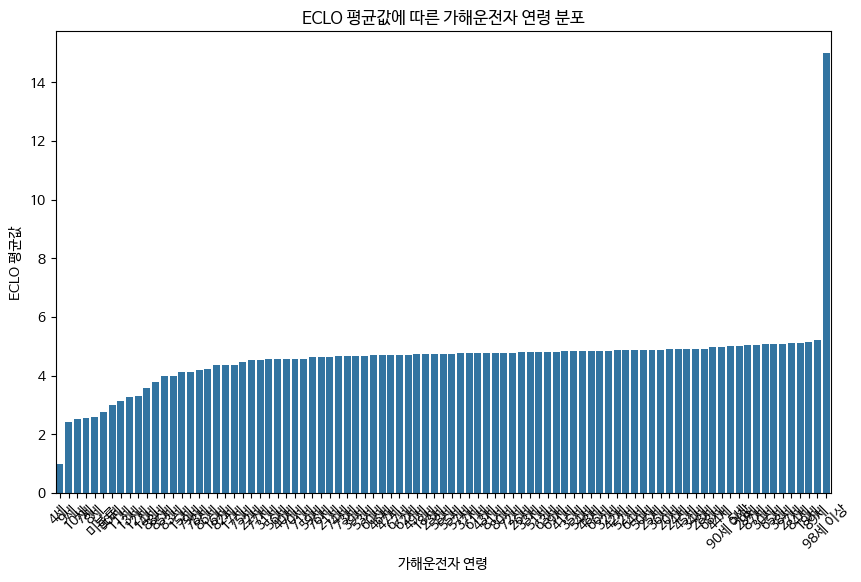

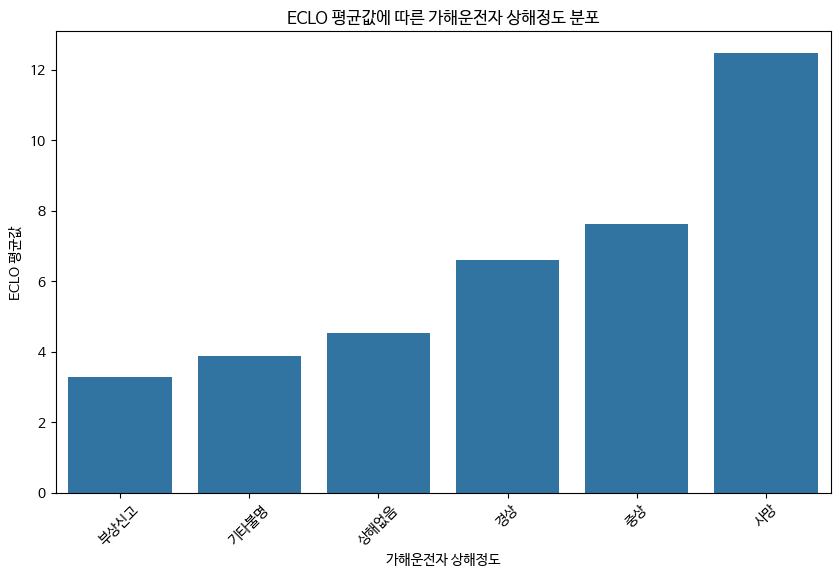

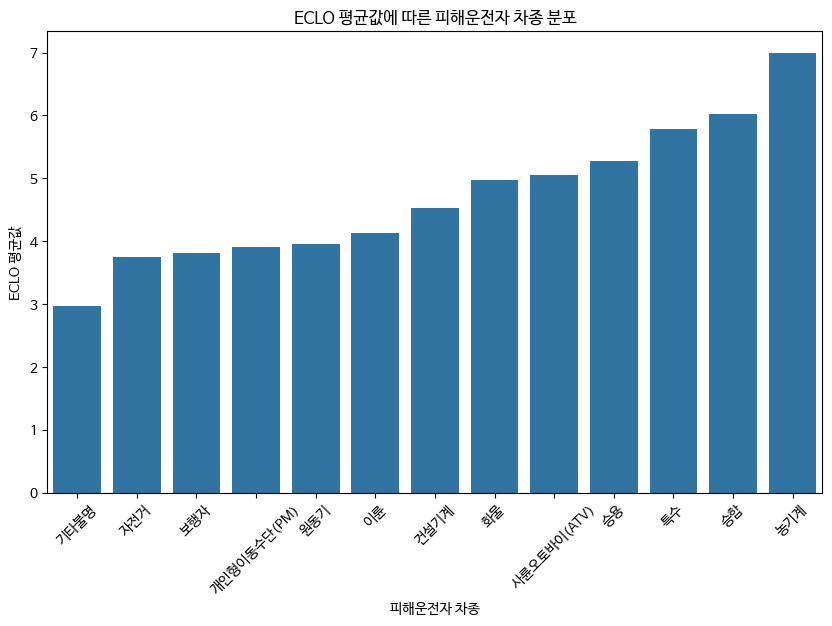

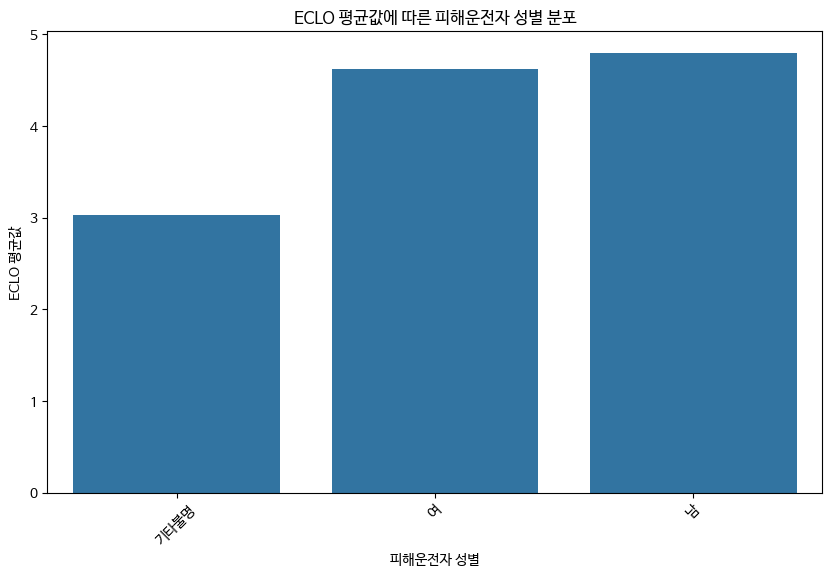

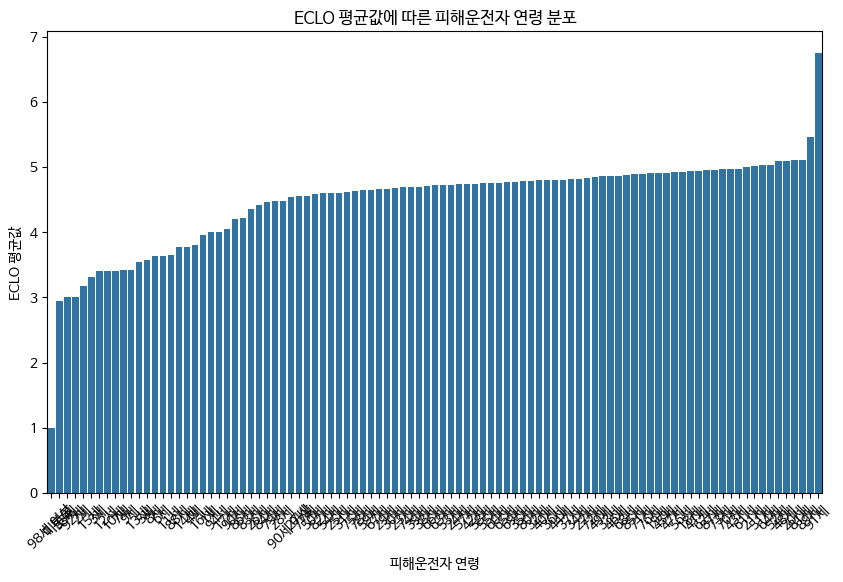

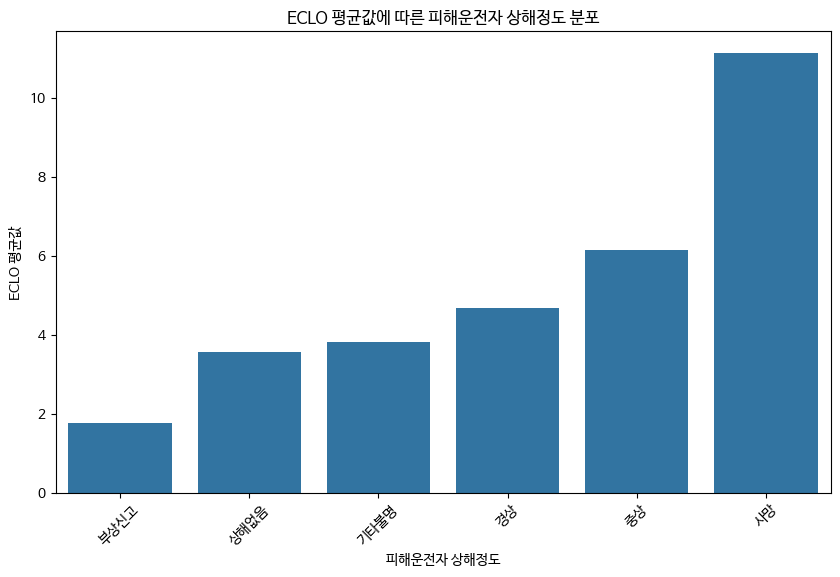

In [75]:
accident_type = ['사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도']
for column in accident_type:
    plt.rc('xtick', labelsize=10)
    plt.figure(figsize = (10,6))
    data_grouped = train_df.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)

    plt.show()

<Axes: xlabel='ECLO', ylabel='Count'>

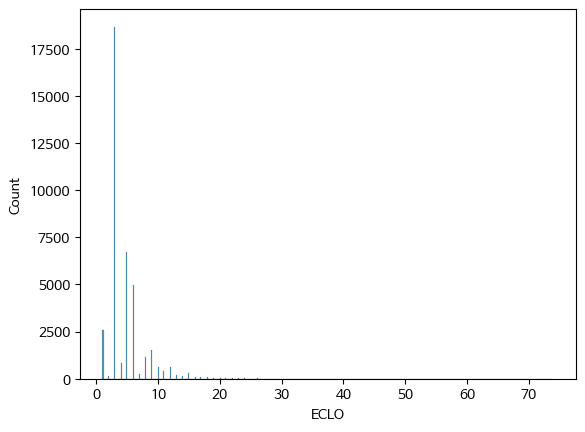

In [76]:
sns.histplot(train_df['ECLO'])

In [77]:
train.ECLO.describe()

count    39609.000000
mean         4.726704
std          3.207206
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

In [61]:
train[train['가해운전자 연령'] == '98세 이상']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
22078,ACCIDENT_22078,2020-08-10 16,월요일,비,대구광역시 북구 사수동,단일로 - 기타,젖음/습기,차대차,추돌,안전거리미확보,건설기계,남,98세 이상,상해없음,승용,남,49세,경상,0,0,5,0,15


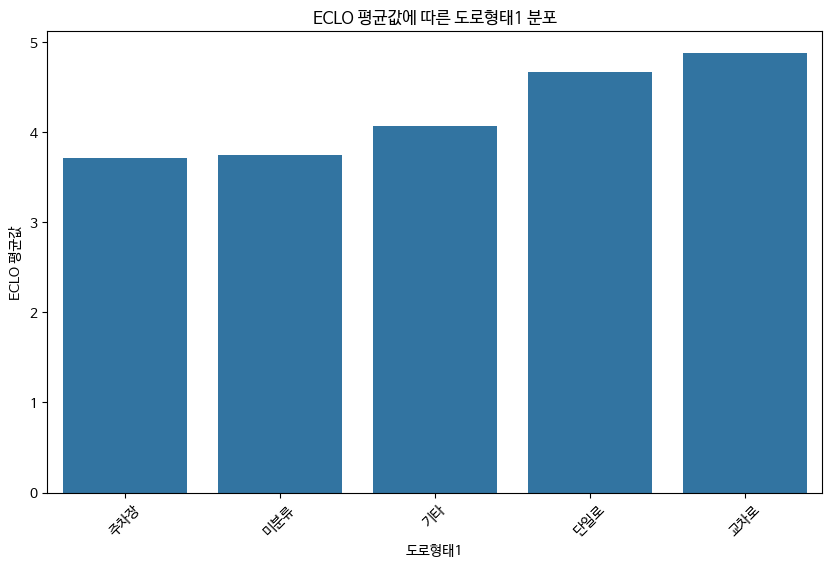

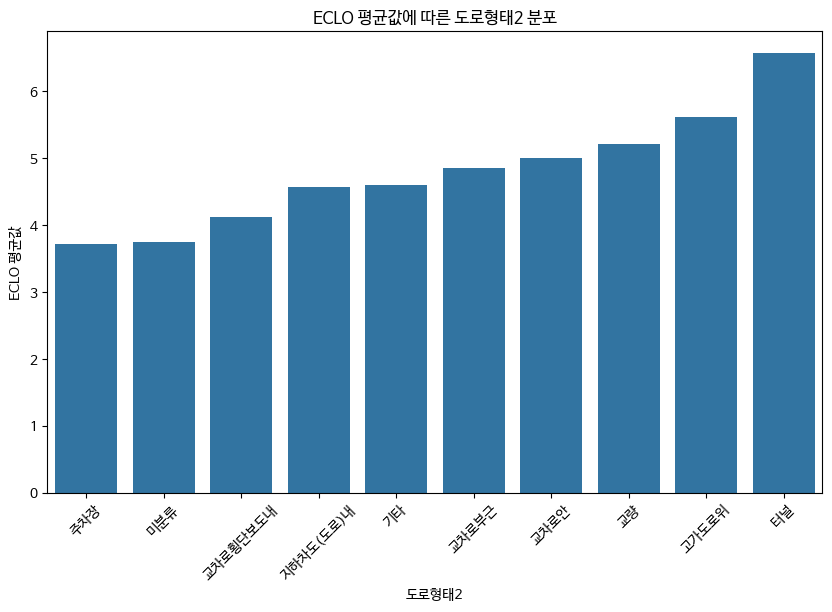

In [78]:
accident_type = ['도로형태1', '도로형태2']
for column in accident_type:
    plt.rc('xtick', labelsize=10)
    plt.figure(figsize = (10,6))
    data_grouped = train_df.groupby(column)['ECLO'].mean().sort_values()
    sns.barplot(x=data_grouped.index, y=data_grouped.values)
    plt.title(f"ECLO 평균값에 따른 {column} 분포")
    plt.ylabel("ECLO 평균값")
    plt.xlabel(column)
    plt.xticks(rotation=45)

    plt.show()

In [79]:
val =['사망자수', '중상자수','경상자수', '부상자수']
train_df[val].describe()

,사망자수,중상자수,경상자수,부상자수
count,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865
std,0.090109,0.500845,0.992034,0.394670
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,2.000000,6.000000,22.000000,10.000000


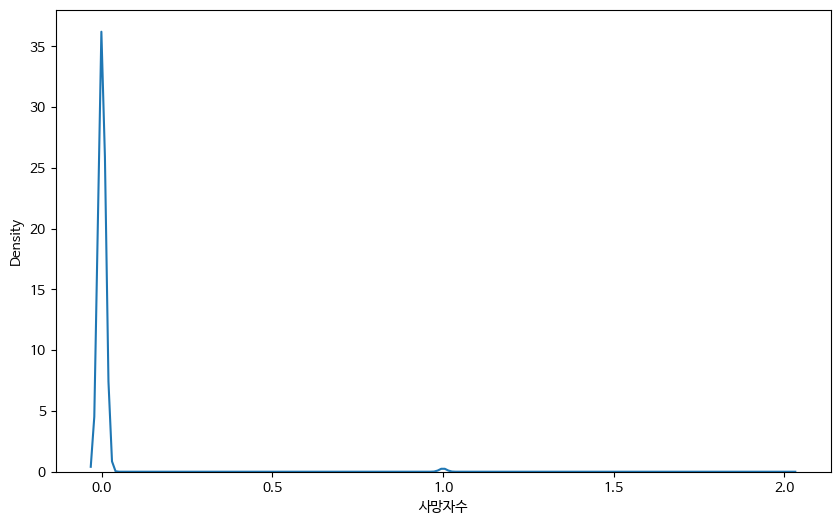

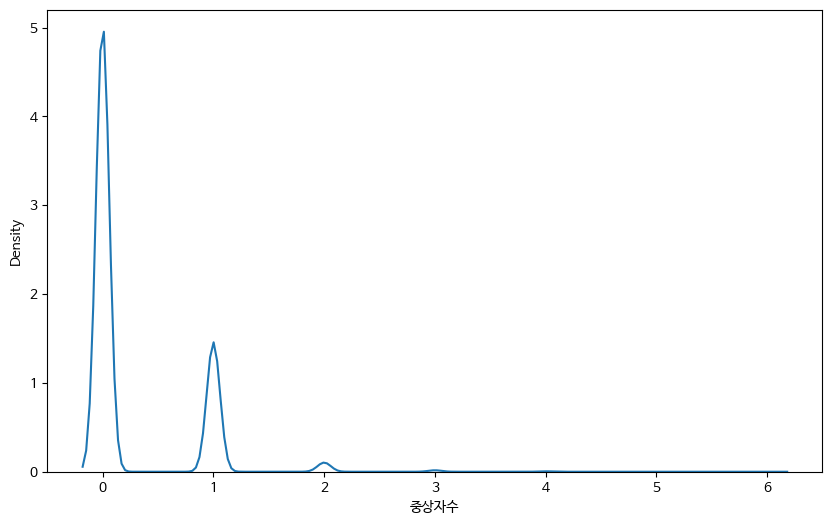

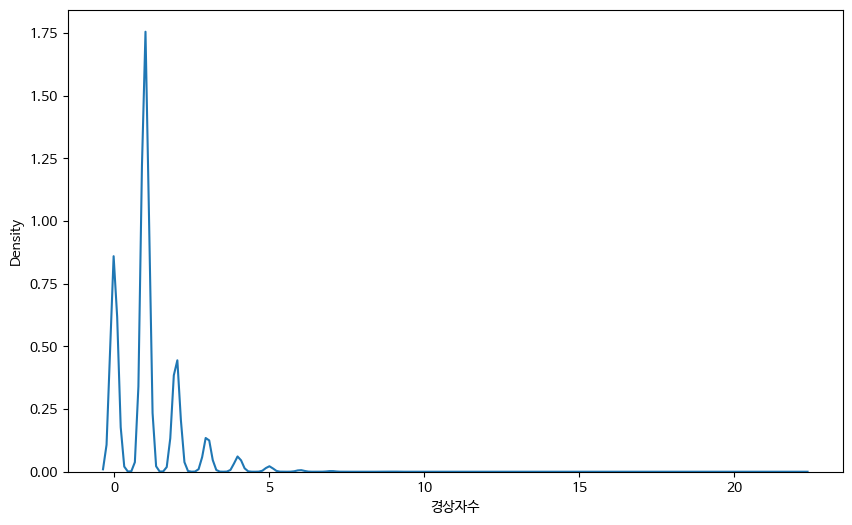

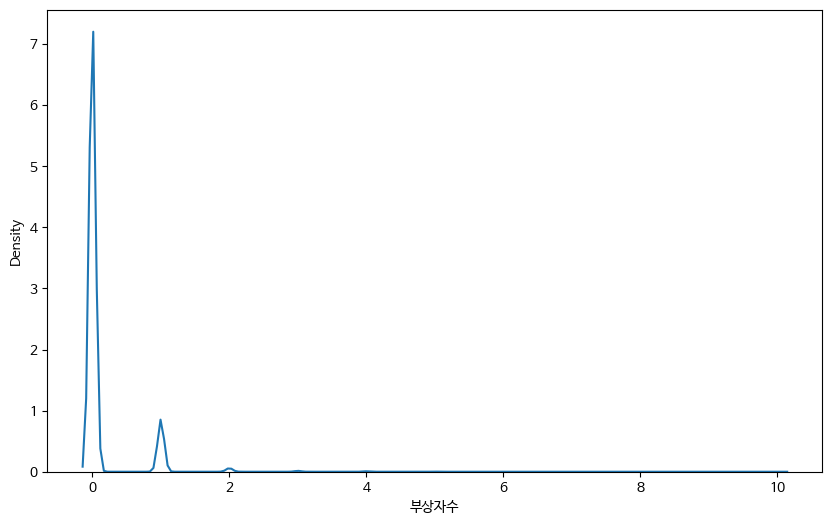

In [80]:
for i in val:
    plt.figure(figsize = (10,6))
    sns.kdeplot(train_df[i])


In [81]:
for i in val:
    print(train_df[i].value_counts())
print(train_df['ECLO'].value_counts())

사망자수
0    39309
1      292
2        8
Name: count, dtype: int64
중상자수
0    30136
1     8724
2      618
3       98
4       28
5        4
6        1
Name: count, dtype: int64
경상자수
1     20913
0     10284
2      5560
3      1728
4       732
5       259
6        77
7        32
8         7
9         7
10        2
15        2
14        1
11        1
12        1
18        1
13        1
22        1
Name: count, dtype: int64
부상자수
0     35168
1      4046
2       279
3        67
4        35
5         9
6         3
7         1
10        1
Name: count, dtype: int64
ECLO
3     18675
5      6743
6      4967
1      2578
9      1528
8      1152
4       818
10      611
12      611
11      394
15      283
7       263
13      194
2       150
14      145
16      101
18       89
17       78
20       39
19       36
21       33
24       18
23       17
22       17
26       12
27       11
25        7
28        6
30        5
31        4
34        3
32        3
37        3
33        2
35        2
36        1
40   

In [82]:
#train_df[(train_df['사망자수'] == 2) & (traind_df['가해운전자 연령'] == '90세이상')]
train_df[train_df['ECLO'] == 74][val]

,사망자수,중상자수,경상자수,부상자수
32591,0,4,18,0


# Pre-processing

In [14]:
# 변수변환
def transform(data):
    time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

    data_df = data.copy()
    data_df[['연', '월', '일', '시간']] = data['사고일시'].str.extract(time_pattern)
    data_df[['연', '월', '일', '시간']] = data_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
    data_df = data_df.drop(columns=['사고일시'])

    location_pattern = r'(\S+) (\S+) (\S+)'

    data_df[['도시', '구', '동']] = data['시군구'].str.extract(location_pattern)
    data_df = data_df.drop(columns=['시군구'])

    road_pattern = r'(.+) - (.+)'

    data_df[['도로형태1', '도로형태2']] = data['도로형태'].str.extract(road_pattern)
    data_df = data_df.drop(columns=['도로형태'])
    return data_df

In [15]:
# 범주형 변수에 label encoding
def label_encoding(data):
    categorical_features = list(data.dtypes[data.dtypes == "object"].index)
    # 추출된 문자열 변수 확인
    for i in categorical_features:
        le = LabelEncoder()
        le=le.fit(data[i])
        data[i]=le.transform(data[i])

        for case in np.unique(test_x[i]):
            if case not in le.classes_:
                le.classes_ = np.append(le.classes_, case)
        test_x[i]=le.transform(test_x[i])
    return data

In [16]:
# 행정동 통계치를 법정동 통계치로 변경하는 함수
def match(data):
    # 행정동/법정동 코드는 현행 8자리이나, 행안부 홈페이지에서 받은 자료는 10자리로 되어 있음
    df_match = pd.read_csv(path+'KIKmix.20211231.csv')
    df_match = df_match.dropna()
    df_match['행정동코드'] = (df_match['행정동코드']/100).astype(np.int64)
    df_match['법정동코드'] = (df_match['법정동코드']/100).astype(np.int64)
    df_match = df_match[df_match['시도명'] == '대구광역시']
    df_match = pd.merge(df_match, df_match[['행정동코드','법정동코드']].groupby('행정동코드').count().rename(columns={'법정동코드':'법정동갯수'}).reset_index(), how='left')

    # 법정동에 속하지 않는 행만 추출
    val = df_match['동리명'].unique()
    hang_dong = data[~data['동'].isin(val)]
    bub_dong = data[data['동'].isin(val)]
    print(f'행정동 갯수:{hang_dong.shape[0]}')

    # 행정동 기준으로 병합
    df = pd.merge(df_match, hang_dong, how='left', left_on='읍면동명', right_on = '동')
    df = df.dropna()

    # 붙인 테이블에서 통계치에 해당하는 열 범위를 리스트로 지정
    # 통계치 조정 루프용
    col = [df.columns[-1]]

    # 행정동-법정동 매칭하면서 통계치를 같이 변동시켜주는 루프
    # 행정동 통계치를 법정동 갯수로 나눔
    for c in col:
        df[c] = df[c]/df['법정동갯수']

    del df['법정동갯수']

    df_info = df[['도시','구','동리명','법정동코드']].groupby('법정동코드').first().reset_index()

    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df = df[numeric_columns].groupby('법정동코드').sum().reset_index()

    df = pd.merge(df_info, df, how='left', on = '법정동코드')
    df = df.dropna()

    del df['법정동코드']
    del df['행정동코드']
    del df['생성일자']

    df.rename(columns = {'동리명':'동'}, inplace = True)
    df = df.iloc[:,[0,1,2,-1]]
    df = pd.concat([bub_dong, df])
    df = df.groupby(['도시', '구', '동']).sum().reset_index()

    return df

In [17]:
def merge_data(train):
  ### 장애인보호시설
  data1 = pd.read_csv(path+'대구광역시_장애인주간보호시설현황_20201231.csv', encoding = 'cp949')
  data1['장애인보호시설개수'] = 1
  data1['구'] = data1['소재지'].map(lambda x: x.split( )[0] )
  data1=data1.groupby(['구']).agg(sum).reset_index()
  data1 = data1[['구','정원','장애인보호시설개수']]
  train = pd.merge(train, data1, how='left',on='구')

  ### 응급의료기관
  data1 = pd.read_csv(path+'대구광역시응급의료기관현황(2019년 1월).csv', encoding = 'cp949')
  data1['동'] = data1['세부주소'].str.extract(r'\((.*?)\)')
  data1['동'].value_counts()
  data1['응급의료센터개수']=1
  data1=data1.groupby(['동']).agg(sum).reset_index()
  data1 = data1[['동','응급의료센터개수']]
  train = pd.merge(train, data1, how='left',on='동')


  ### 지역경찰
  data1 = pd.read_csv(path+'경찰청 대구광역시경찰청_관서별 지역경찰 현황_20221231.csv', encoding = 'cp949')
  data1['구'] = data1['주소'].map(lambda x: x.split(' ')[1])
  data1['지구대파출소개수']=1
  data1=data1.groupby(['구']).sum().reset_index()
  data1 = data1[['구','지구대파출소개수']]
  train = pd.merge(train, data1, how='left',on='구')

  ### 경로당
  data1 = pd.read_csv(path+'경로당현황_20211110.csv', encoding='cp949')
  for i in range(data1.shape[0]):
    juso=data1.iloc[i]['주소'].split(' ')
    if juso[0]=='대구광역시':
      data1.iloc[i,-2] =juso[1]
    else:
      data1.iloc[i,-2] = juso[0]
  data1['경로당개수']=1
  data1.rename(columns = {'주소' : '구'}, inplace = True)
  data1=data1.groupby(['구']).sum().reset_index()
  data1 = data1[['구','경로당개수']]
  train = pd.merge(train, data1, how='left',on='구')

  ###노인복지
  data1 = pd.read_csv(path+'대구광역시_노인요양시설_20210930_수정.csv', encoding='cp949')
  data1['요양시설개수'] = 1
  data1.rename(columns = {'구분' : '구'}, inplace = True)
  data1=data1.groupby(['구']).agg(sum).reset_index()

  data1 = data1[['구','입소정원','요양시설개수']]
  train = pd.merge(train, data1, how='left',on='구')
  return train

In [18]:
train_df = transform(train)
test_df = transform(test)

In [19]:
light_df = match(light_df) # 행정동으로 수집된 데이터를 법정동 기준으로 변경

행정동 갯수:46


In [20]:
# 시간 범주화
train_df['time_cat'] = 0
train_df.loc[(train_df['시간'] >= 6) & (train_df['시간'] <= 14), 'time_cat'] = '오전'
train_df.loc[(train_df['시간'] >= 15) & (train_df['시간'] <= 20), 'time_cat'] = '오후'
train_df.loc[(train_df['시간'] >= 21) | (train_df['시간'] <= 5), 'time_cat'] = '심야'

test_df['time_cat'] = 0
test_df.loc[(test_df['시간'] >= 6) & (test_df['시간'] <= 14), 'time_cat'] = '오전'
test_df.loc[(test_df['시간'] >= 15) & (test_df['시간'] <= 20), 'time_cat'] = '오후'
test_df.loc[(test_df['시간'] >= 21) | (test_df['시간'] <= 5), 'time_cat'] = '심야'

train_df = train_df.drop('시간', axis = 1)
test_df = test_df.drop('시간', axis = 1)

In [21]:
# 데이터 병합
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, accident, how='left', on=['도시', '구', '동', '연'])
train_df = pd.merge(train_df, CCTV_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, pop_df, how='left', on=['구'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])
accident_2021 = accident[accident['연'] == 2021].drop('연',axis = 1)
test_df = pd.merge(test_df, accident_2021, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, CCTV_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, pop_df, how='left', on=['구'])


In [22]:
train_df = merge_data(train_df)
test_df = merge_data(test_df)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                39609 non-null  object 
 1   요일                39609 non-null  object 
 2   기상상태              39609 non-null  object 
 3   노면상태              39609 non-null  object 
 4   사고유형              39609 non-null  object 
 5   사고유형 - 세부분류       39609 non-null  object 
 6   법규위반              39609 non-null  object 
 7   가해운전자 차종          39609 non-null  object 
 8   가해운전자 성별          39609 non-null  object 
 9   가해운전자 연령          39609 non-null  object 
 10  가해운전자 상해정도        39609 non-null  object 
 11  피해운전자 차종          38618 non-null  object 
 12  피해운전자 성별          38618 non-null  object 
 13  피해운전자 연령          38618 non-null  object 
 14  피해운전자 상해정도        38618 non-null  object 
 15  사망자수              39609 non-null  int64  
 16  중상자수              39609 non-null  int64 

In [24]:
# test set에서 사용가능한 변수만 선택
test_x = test_df.drop(columns=['ID']).copy()
train_x = train_df[test_x.columns].copy()
train_y = train_df['ECLO'].copy()

In [25]:
# 결측값 0으로 수정
train_x.fillna(0, inplace=True)
test_x.fillna(0, inplace=True)

In [26]:
categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
categorical_features

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2', 'time_cat']

In [27]:
display(train_x)
display(test_x)

,요일,기상상태,노면상태,사고유형,연,월,일,도시,구,동,도로형태1,도로형태2,time_cat,설치개수,child_area_count,급지구분_1,급지구분_2,급지구분_3,accident_count,사고건수,사망,중상,경상,부상,단속구분_1,단속구분_2,단속구분_4,단속구분_99,2021년05월_총인구수,정원,장애인보호시설개수,응급의료센터개수,지구대파출소개수,경로당개수,입소정원,요양시설개수
0,화요일,맑음,건조,차대사람,2019,1,1,대구광역시,중구,대신동,단일로,기타,심야,391.0,2.0,11.0,0.0,0.0,2.0,8.0,2.0,3.0,3.0,0.0,0.0,1.0,4.0,0.0,75133,69,5,0.0,4,48,191,6
1,화요일,흐림,건조,차대사람,2019,1,1,대구광역시,달서구,감삼동,단일로,기타,심야,932.0,0.0,0.0,1.0,3.0,4.0,19.0,1.0,6.0,9.0,4.0,1.0,3.0,8.0,0.0,552192,149,10,1.0,13,274,1216,38
2,화요일,맑음,건조,차대사람,2019,1,1,대구광역시,수성구,두산동,단일로,기타,심야,473.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
3,화요일,맑음,건조,차대차,2019,1,1,대구광역시,북구,복현동,단일로,기타,심야,597.0,11.0,0.0,9.0,5.0,1.0,3.0,0.0,2.0,1.0,0.0,2.0,8.0,0.0,0.0,437892,125,7,0.0,8,275,1843,61
4,화요일,맑음,건조,차대차,2019,1,1,대구광역시,동구,신암동,단일로,기타,심야,2058.0,0.0,0.0,1.0,0.0,2.0,10.0,0.0,3.0,7.0,0.0,2.0,10.0,0.0,0.0,341730,143,8,0.0,9,213,1451,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,2021,12,31,대구광역시,수성구,수성동3가,교차로,교차로안,오후,245.5,1.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
39605,금요일,맑음,건조,차대차,2021,12,31,대구광역시,달서구,상인동,단일로,기타,오후,843.0,0.0,0.0,0.0,5.0,1.0,3.0,0.0,0.0,2.0,1.0,4.0,11.0,12.0,3.0,552192,149,10,0.0,13,274,1216,38
39606,금요일,맑음,건조,차대차,2021,12,31,대구광역시,달서구,월성동,교차로,교차로안,심야,164.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,13.0,0.0,552192,149,10,0.0,13,274,1216,38
39607,금요일,맑음,건조,차대차,2021,12,31,대구광역시,달서구,장동,기타,기타,심야,210.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,552192,149,10,0.0,13,274,1216,38


,요일,기상상태,노면상태,사고유형,연,월,일,도시,구,동,도로형태1,도로형태2,time_cat,설치개수,child_area_count,급지구분_1,급지구분_2,급지구분_3,accident_count,사고건수,사망,중상,경상,부상,단속구분_1,단속구분_2,단속구분_4,단속구분_99,2021년05월_총인구수,정원,장애인보호시설개수,응급의료센터개수,지구대파출소개수,경로당개수,입소정원,요양시설개수
0,토요일,맑음,건조,차대사람,2022,1,1,대구광역시,수성구,상동,교차로,교차로안,심야,700.00,5.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
1,토요일,맑음,건조,차대사람,2022,1,1,대구광역시,수성구,지산동,단일로,기타,심야,867.00,10.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
2,토요일,맑음,건조,차대차,2022,1,1,대구광역시,수성구,수성동2가,교차로,교차로안,심야,245.50,1.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
3,토요일,맑음,건조,차대차,2022,1,1,대구광역시,수성구,신매동,단일로,기타,심야,325.25,7.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,0.0,0.0,420820,132,8,1.0,7,247,481,16
4,토요일,맑음,건조,차대차,2022,1,1,대구광역시,달서구,감삼동,교차로,교차로안,오전,932.00,0.0,0.0,1.0,3.0,1.0,4.0,0.0,2.0,2.0,0.0,1.0,3.0,8.0,0.0,552192,149,10,1.0,13,274,1216,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,토요일,맑음,건조,차대차,2022,12,31,대구광역시,남구,대명동,단일로,터널,오후,5377.00,26.0,20.0,1.0,0.0,2.0,8.0,0.0,1.0,7.0,0.0,7.0,20.0,35.0,0.0,146066,143,7,3.0,5,64,806,26
10959,토요일,맑음,건조,차대차,2022,12,31,대구광역시,수성구,시지동,단일로,기타,오후,165.25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
10960,토요일,맑음,건조,차대차,2022,12,31,대구광역시,수성구,연호동,단일로,기타,오후,165.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
10961,토요일,맑음,건조,차대차,2022,12,31,대구광역시,수성구,범물동,교차로,교차로부근,오후,390.00,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,420820,132,8,0.0,7,247,481,16


In [28]:
# 사망자가 발생한 사건의 데이터 확인
index = train_df[train_df['사망자수']>0].index
train_dead = train_x.iloc[index,:]
train_dead

,요일,기상상태,노면상태,사고유형,연,월,일,도시,구,동,도로형태1,도로형태2,time_cat,설치개수,child_area_count,급지구분_1,급지구분_2,급지구분_3,accident_count,사고건수,사망,중상,경상,부상,단속구분_1,단속구분_2,단속구분_4,단속구분_99,2021년05월_총인구수,정원,장애인보호시설개수,응급의료센터개수,지구대파출소개수,경로당개수,입소정원,요양시설개수
95,금요일,맑음,건조,차대사람,2019,1,4,대구광역시,달서구,이곡동,단일로,기타,오전,404.0,0.0,0.0,1.0,1.0,1.0,5.0,0.0,2.0,3.0,0.0,3.0,7.0,13.0,0.0,552192,149,10,0.0,13,274,1216,38
127,토요일,맑음,건조,차대차,2019,1,5,대구광역시,동구,지묘동,기타,기타,오전,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,341730,143,8,0.0,9,213,1451,43
164,일요일,맑음,건조,차대차,2019,1,6,대구광역시,달성군,구지면,교차로,교차로안,오전,579.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,0.0,0.0,260403,55,3,0.0,11,295,1602,38
187,월요일,맑음,건조,차대사람,2019,1,7,대구광역시,수성구,만촌동,단일로,기타,심야,1719.0,18.0,0.0,0.0,3.0,2.0,8.0,1.0,2.0,4.0,1.0,8.0,7.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
354,토요일,비,젖음/습기,차대차,2019,1,12,대구광역시,달성군,유가읍,교차로,교차로안,심야,458.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,2.0,260403,55,3,0.0,11,295,1602,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38936,금요일,맑음,건조,차대사람,2021,12,10,대구광역시,달서구,죽전동,단일로,기타,오전,399.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,552192,149,10,0.0,13,274,1216,38
38997,일요일,맑음,건조,차대사람,2021,12,12,대구광역시,동구,방촌동,교차로,교차로안,심야,917.5,0.0,0.0,0.0,2.0,1.0,4.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,341730,143,8,0.0,9,213,1451,43
39049,월요일,맑음,건조,차대차,2021,12,13,대구광역시,수성구,수성동3가,교차로,교차로부근,오후,245.5,1.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
39197,일요일,눈,젖음/습기,차량단독,2021,12,19,대구광역시,동구,대림동,단일로,기타,심야,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341730,143,8,0.0,9,213,1451,43


In [29]:
# 사망자가 발생하지 않은 사건의 데이터 확인
train_not_dead = train_x.loc[~train_x.index.isin(index)]
train_not_dead

,요일,기상상태,노면상태,사고유형,연,월,일,도시,구,동,도로형태1,도로형태2,time_cat,설치개수,child_area_count,급지구분_1,급지구분_2,급지구분_3,accident_count,사고건수,사망,중상,경상,부상,단속구분_1,단속구분_2,단속구분_4,단속구분_99,2021년05월_총인구수,정원,장애인보호시설개수,응급의료센터개수,지구대파출소개수,경로당개수,입소정원,요양시설개수
0,화요일,맑음,건조,차대사람,2019,1,1,대구광역시,중구,대신동,단일로,기타,심야,391.0,2.0,11.0,0.0,0.0,2.0,8.0,2.0,3.0,3.0,0.0,0.0,1.0,4.0,0.0,75133,69,5,0.0,4,48,191,6
1,화요일,흐림,건조,차대사람,2019,1,1,대구광역시,달서구,감삼동,단일로,기타,심야,932.0,0.0,0.0,1.0,3.0,4.0,19.0,1.0,6.0,9.0,4.0,1.0,3.0,8.0,0.0,552192,149,10,1.0,13,274,1216,38
2,화요일,맑음,건조,차대사람,2019,1,1,대구광역시,수성구,두산동,단일로,기타,심야,473.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
3,화요일,맑음,건조,차대차,2019,1,1,대구광역시,북구,복현동,단일로,기타,심야,597.0,11.0,0.0,9.0,5.0,1.0,3.0,0.0,2.0,1.0,0.0,2.0,8.0,0.0,0.0,437892,125,7,0.0,8,275,1843,61
4,화요일,맑음,건조,차대차,2019,1,1,대구광역시,동구,신암동,단일로,기타,심야,2058.0,0.0,0.0,1.0,0.0,2.0,10.0,0.0,3.0,7.0,0.0,2.0,10.0,0.0,0.0,341730,143,8,0.0,9,213,1451,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,금요일,맑음,건조,차대차,2021,12,31,대구광역시,수성구,수성동3가,교차로,교차로안,오후,245.5,1.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
39605,금요일,맑음,건조,차대차,2021,12,31,대구광역시,달서구,상인동,단일로,기타,오후,843.0,0.0,0.0,0.0,5.0,1.0,3.0,0.0,0.0,2.0,1.0,4.0,11.0,12.0,3.0,552192,149,10,0.0,13,274,1216,38
39606,금요일,맑음,건조,차대차,2021,12,31,대구광역시,달서구,월성동,교차로,교차로안,심야,164.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,13.0,0.0,552192,149,10,0.0,13,274,1216,38
39607,금요일,맑음,건조,차대차,2021,12,31,대구광역시,달서구,장동,기타,기타,심야,210.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,552192,149,10,0.0,13,274,1216,38


# Modeling(automl)

In [32]:
# model_1 - baseline
train_xy = pd.concat([train_x, train_y], axis = 1)

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

ag_scorer = make_scorer(name='rmsle',
  score_func=rmsle,
  optimum=0,
  greater_is_better=False) # 대회에 맞는 평가 metric인 rmlse로 custom

model_1 = TabularPredictor(label='ECLO',eval_metric=ag_scorer, problem_type='regression').fit(train_xy)

# best preset 시간이 많이 걸리지만 성능은 가장 좋음
# model_1_best = TabularPredictor(label='ECLO', eval_metric=ag_scorer,problem_type='regression').fit(train_xy, presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240612_123438"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240612_123438"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024
C

**model_1 결과**  
Best model: "WeightedEnsemble_L2"  
-0.4427	 = Validation score   (-rmsle)  
total runtime = 251.83s

In [67]:
model_1_pred_ECLO = model_1.predict(test_x)

In [45]:
# multilabelpredictor 소스 코드
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.common.utils.utils import setup_outputdir
from autogluon.core.utils.loaders import load_pkl
from autogluon.core.utils.savers import save_pkl
import os.path

class MultilabelPredictor:
    """ Tabular Predictor for predicting multiple columns in table.
        Creates multiple TabularPredictor objects which you can also use individually.
        You can access the TabularPredictor for a particular label via: `multilabel_predictor.get_predictor(label_i)`

        Parameters
        ----------
        labels : List[str]
            The ith element of this list is the column (i.e. `label`) predicted by the ith TabularPredictor stored in this object.
        path : str, default = None
            Path to directory where models and intermediate outputs should be saved.
            If unspecified, a time-stamped folder called "AutogluonModels/ag-[TIMESTAMP]" will be created in the working directory to store all models.
            Note: To call `fit()` twice and save all results of each fit, you must specify different `path` locations or don't specify `path` at all.
            Otherwise files from first `fit()` will be overwritten by second `fit()`.
            Caution: when predicting many labels, this directory may grow large as it needs to store many TabularPredictors.
        problem_types : List[str], default = None
            The ith element is the `problem_type` for the ith TabularPredictor stored in this object.
        eval_metrics : List[str], default = None
            The ith element is the `eval_metric` for the ith TabularPredictor stored in this object.
        consider_labels_correlation : bool, default = True
            Whether the predictions of multiple labels should account for label correlations or predict each label independently of the others.
            If True, the ordering of `labels` may affect resulting accuracy as each label is predicted conditional on the previous labels appearing earlier in this list (i.e. in an auto-regressive fashion).
            Set to False if during inference you may want to individually use just the ith TabularPredictor without predicting all the other labels.
        kwargs :
            Arguments passed into the initialization of each TabularPredictor.

    """

    multi_predictor_file = 'multilabel_predictor.pkl'

    def __init__(self, labels, path=None, problem_types=None, eval_metrics=None, consider_labels_correlation=True, **kwargs):
        if len(labels) < 2:
            raise ValueError("MultilabelPredictor is only intended for predicting MULTIPLE labels (columns), use TabularPredictor for predicting one label (column).")
        if (problem_types is not None) and (len(problem_types) != len(labels)):
            raise ValueError("If provided, `problem_types` must have same length as `labels`")
        if (eval_metrics is not None) and (len(eval_metrics) != len(labels)):
            raise ValueError("If provided, `eval_metrics` must have same length as `labels`")
        self.path = setup_outputdir(path, warn_if_exist=False)
        self.labels = labels
        self.consider_labels_correlation = consider_labels_correlation
        self.predictors = {}  # key = label, value = TabularPredictor or str path to the TabularPredictor for this label
        if eval_metrics is None:
            self.eval_metrics = {}
        else:
            self.eval_metrics = {labels[i] : eval_metrics[i] for i in range(len(labels))}
        problem_type = None
        eval_metric = None
        for i in range(len(labels)):
            label = labels[i]
            path_i = os.path.join(self.path, "Predictor_" + str(label))
            if problem_types is not None:
                problem_type = problem_types[i]
            if eval_metrics is not None:
                eval_metric = eval_metrics[i]
            self.predictors[label] = TabularPredictor(label=label, problem_type=problem_type, eval_metric=eval_metric, path=path_i, **kwargs)

    def fit(self, train_data, tuning_data=None, **kwargs):
        """ Fits a separate TabularPredictor to predict each of the labels.

            Parameters
            ----------
            train_data, tuning_data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                See documentation for `TabularPredictor.fit()`.
            kwargs :
                Arguments passed into the `fit()` call for each TabularPredictor.
        """
        if isinstance(train_data, str):
            train_data = TabularDataset(train_data)
        if tuning_data is not None and isinstance(tuning_data, str):
            tuning_data = TabularDataset(tuning_data)
        train_data_og = train_data.copy()
        if tuning_data is not None:
            tuning_data_og = tuning_data.copy()
        else:
            tuning_data_og = None
        save_metrics = len(self.eval_metrics) == 0
        for i in range(len(self.labels)):
            label = self.labels[i]
            predictor = self.get_predictor(label)
            if not self.consider_labels_correlation:
                labels_to_drop = [l for l in self.labels if l != label]
            else:
                labels_to_drop = [self.labels[j] for j in range(i+1, len(self.labels))]
            train_data = train_data_og.drop(labels_to_drop, axis=1)
            if tuning_data is not None:
                tuning_data = tuning_data_og.drop(labels_to_drop, axis=1)
            print(f"Fitting TabularPredictor for label: {label} ...")
            predictor.fit(train_data=train_data, tuning_data=tuning_data, **kwargs)
            self.predictors[label] = predictor.path
            if save_metrics:
                self.eval_metrics[label] = predictor.eval_metric
        self.save()

    def predict(self, data, **kwargs):
        """ Returns DataFrame with label columns containing predictions for each label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to make predictions for. If label columns are present in this data, they will be ignored. See documentation for `TabularPredictor.predict()`.
            kwargs :
                Arguments passed into the predict() call for each TabularPredictor.
        """
        return self._predict(data, as_proba=False, **kwargs)

    def predict_proba(self, data, **kwargs):
        """ Returns dict where each key is a label and the corresponding value is the `predict_proba()` output for just that label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to make predictions for. See documentation for `TabularPredictor.predict()` and `TabularPredictor.predict_proba()`.
            kwargs :
                Arguments passed into the `predict_proba()` call for each TabularPredictor (also passed into a `predict()` call).
        """
        return self._predict(data, as_proba=True, **kwargs)

    def evaluate(self, data, **kwargs):
        """ Returns dict where each key is a label and the corresponding value is the `evaluate()` output for just that label.

            Parameters
            ----------
            data : str or autogluon.tabular.TabularDataset or pd.DataFrame
                Data to evalate predictions of all labels for, must contain all labels as columns. See documentation for `TabularPredictor.evaluate()`.
            kwargs :
                Arguments passed into the `evaluate()` call for each TabularPredictor (also passed into the `predict()` call).
        """
        data = self._get_data(data)
        eval_dict = {}
        for label in self.labels:
            print(f"Evaluating TabularPredictor for label: {label} ...")
            predictor = self.get_predictor(label)
            eval_dict[label] = predictor.evaluate(data, **kwargs)
            if self.consider_labels_correlation:
                data[label] = predictor.predict(data, **kwargs)
        return eval_dict

    def save(self):
        """ Save MultilabelPredictor to disk. """
        for label in self.labels:
            if not isinstance(self.predictors[label], str):
                self.predictors[label] = self.predictors[label].path
        save_pkl.save(path=os.path.join(self.path, self.multi_predictor_file), object=self)
        print(f"MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('{self.path}')")

    @classmethod
    def load(cls, path):
        """ Load MultilabelPredictor from disk `path` previously specified when creating this MultilabelPredictor. """
        path = os.path.expanduser(path)
        return load_pkl.load(path=os.path.join(path, cls.multi_predictor_file))

    def get_predictor(self, label):
        """ Returns TabularPredictor which is used to predict this label. """
        predictor = self.predictors[label]
        if isinstance(predictor, str):
            return TabularPredictor.load(path=predictor)
        return predictor

    def _get_data(self, data):
        if isinstance(data, str):
            return TabularDataset(data)
        return data.copy()

    def _predict(self, data, as_proba=False, **kwargs):
        data = self._get_data(data)
        if as_proba:
            predproba_dict = {}
        for label in self.labels:
            print(f"Predicting with TabularPredictor for label: {label} ...")
            predictor = self.get_predictor(label)
            if as_proba:
                predproba_dict[label] = predictor.predict_proba(data, as_multiclass=True, **kwargs)
            data[label] = predictor.predict(data, **kwargs)
        if not as_proba:
            return data[self.labels]
        else:
            return predproba_dict

In [47]:
# model_2 - multilabel
# 사망자수, 중상자수, 경상자수, 부상자수를 각각 예측한 후,
# ECLO 산출식인 ECLO = 10*사망자수 + 5*중상자수 + 3*경상자수 + 1*부상자수 를 통해 계산

train_multilabel = pd.concat([train_x, train_df['사망자수'], train_df['중상자수'], train_df['경상자수'], train_df['부상자수']], axis = 1)

labels = ['사망자수', '중상자수', '경상자수', '부상자수']
problem_types = ['regression', 'regression', 'regression', 'regression']
eval_metrics = [ag_scorer, ag_scorer, ag_scorer, ag_scorer]

model_2 = MultilabelPredictor(labels=labels, problem_types=problem_types, eval_metrics=eval_metrics)
model_2.fit(train_multilabel)

No path specified. Models will be saved in: "AutogluonModels/ag-20240612_131803"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240612_131803/Predictor_사망자수"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:2

Fitting TabularPredictor for label: 사망자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 10 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


Fitting TabularPredictor for label: 중상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 11 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


Fitting TabularPredictor for label: 경상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 12 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


Fitting TabularPredictor for label: 부상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 13 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('AutogluonModels/ag-20240612_131803')


**model_2 결과**  
사망자수  
-0.0512	 = Validation score   (-rmsle)  
total runtime = 190.74s ... Best model: "WeightedEnsemble_L2"  
  
중상자수  
-0.3109	 = Validation score   (-rmsle)  
total runtime = 323.57s ... Best model: "WeightedEnsemble_L2"  
  
경상자수  
-0.3564	 = Validation score   (-rmsle)  
total runtime = 340.96s ... Best model: "WeightedEnsemble_L2"

부상자수  
-0.1759	 = Validation score   (-rmsle)  
total runtime = 179.54s ... Best model: "WeightedEnsemble_L2"
  
total runtime = 17분 14초  

학습 -> 사망자수 예측 -> 학습(+ 예측된 사망자수 변수) -> 중상자수 예측 ->  
학습(+ 예측된 사망자수, 중상자수 변수) -> 경상자수 예측 ->  
학습(+ 예측된 사망자수, 중상자수, 경상자수 변수) -> 부상자수 예측  
**해당 순서로 모델링 되기 때문에 예측하는 변수의 순서가 영향을 미치지 않을까?**

In [49]:
# model_2의 ECLO 계산
model_2_pred = model_2.predict(test_x)
model_2_pred_ECLO = 10*model_2_pred['사망자수'] +5*model_2_pred['중상자수'] + 3*model_2_pred['경상자수'] + model_2_pred['부상자수']

Predicting with TabularPredictor for label: 사망자수 ...
Predicting with TabularPredictor for label: 중상자수 ...
Predicting with TabularPredictor for label: 경상자수 ...
Predicting with TabularPredictor for label: 부상자수 ...


해당 모형의 성능을 확인하기 위해서 전체 train data를 다시 train set과 validation set을 나눈 후  
train set으로 학습시키고 validation set으로 예측한 ECLO와 validation set의 실제 ECLO를 비교하여 RMSLE를 구해야 하지만  
경진대회에 직접 제출하면서 확인하였다.


In [64]:
# model_2_reversed - multilabel_reverse
# 모델의 예측 순서가 성능에 영향을 줄까?

reversed_labels = list(reversed(labels)) # 원래 리스트에서 역순
problem_types = ['regression', 'regression', 'regression', 'regression']
eval_metrics = [ag_scorer, ag_scorer, ag_scorer, ag_scorer]

model_2_reversed = MultilabelPredictor(labels=reversed_labels, problem_types=problem_types, eval_metrics=eval_metrics)
model_2_reversed.fit(train_multilabel)

No path specified. Models will be saved in: "AutogluonModels/ag-20240612_140614"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240612_140614/Predictor_부상자수"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:2

Fitting TabularPredictor for label: 부상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 10 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


Fitting TabularPredictor for label: 경상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 11 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


Fitting TabularPredictor for label: 중상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 12 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


Fitting TabularPredictor for label: 사망자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 16 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3', ...]
		('int', [])    : 13 | ['연', '월', '일', '2021년05월_총인구수', '정원', ...]
		('object', []) :  9 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):


MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('AutogluonModels/ag-20240612_140614')


**model_2_reversed 결과**  
부상자수  
-0.2434	 = Validation score   (-rmsle)  
total runtime = 244.6s ... Best model: "WeightedEnsemble_L2"  
  
경상자수  
-0.3986	 = Validation score   (-rmsle)  
total runtime = 241.94s ... Best model: "WeightedEnsemble_L2"  

중상자수  
-0.2059	 = Validation score    (-rmsle)  
total runtime = 191.62s ... Best model: "WeightedEnsemble_L2"  
   
사망자수  
-0.0201	 = Validation score   (-rmsle)  
total runtime = 157.17s ... Best model: "WeightedEnsemble_L2"  
  

total runtime = 13분 55초  

In [65]:
# model_2_reversed의 ECLO 계산
model_2_reversed_pred = model_2_reversed.predict(test_x)
model_2_reversed_pred_ECLO = 10*model_2_reversed_pred['사망자수'] +5*model_2_reversed_pred['중상자수'] + 3*model_2_reversed_pred['경상자수'] + model_2_reversed_pred['부상자수']

Predicting with TabularPredictor for label: 부상자수 ...
Predicting with TabularPredictor for label: 경상자수 ...
Predicting with TabularPredictor for label: 중상자수 ...
Predicting with TabularPredictor for label: 사망자수 ...


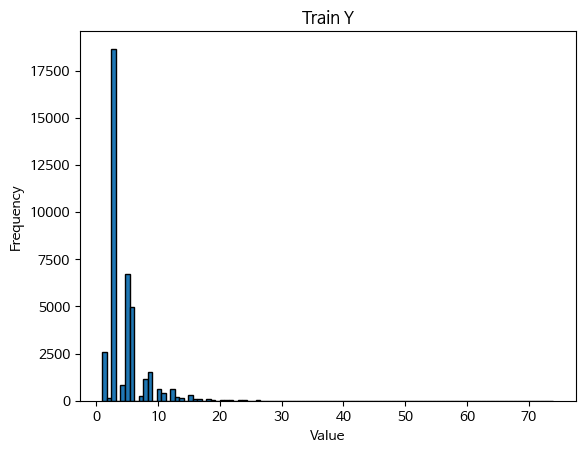

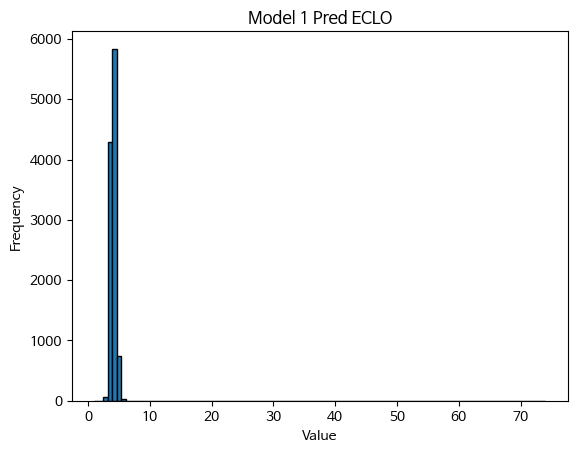

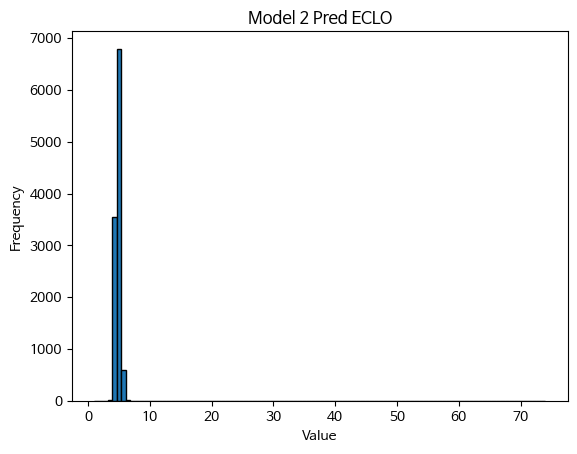

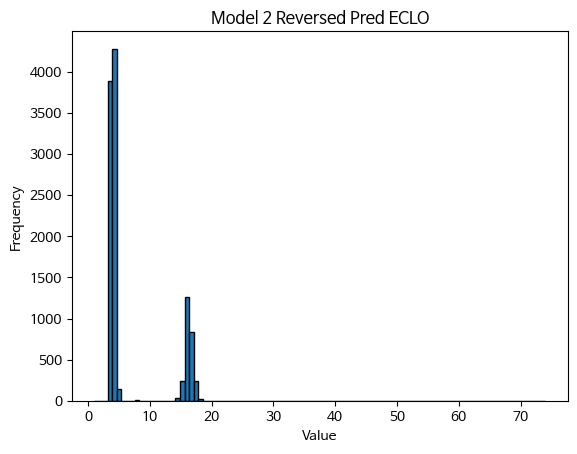

In [79]:
temp = [train_y, model_1_pred_ECLO, model_2_pred_ECLO, model_2_reversed_pred_ECLO]
titles = ['Train Y', 'Model 1 Pred ECLO', 'Model 2 Pred ECLO', 'Model 2 Reversed Pred ECLO']

min_value = min(train_y)
max_value = max(train_y)

for data, title in zip(temp, titles):
    plt.hist(data, bins=100, range=(min_value, max_value), edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

총 세 모형의 예측값의 분포를 기존 데이터의 ELCO 분포와 비교해보았다.  
예측이 잘 되었다면 기존의 분포와 비슷한 형태를 가져야 하지만 그렇지 않은 모습이다.  
형태는 비슷하지만 range가 좁은 경우(model_1, model_2)  
봉우리가 두 개인 경우(model_2_reversed)  
**이러한 형태를 보정할 수 있는 방법이 필요하다.**

In [81]:
for data, title in zip(temp, titles):
    print(title)
    print(data.describe())

Train Y
count    39609.000000
mean         4.726704
std          3.207206
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64
Model 1 Pred ECLO
count    10963.000000
mean         4.037499
std          0.390249
min          2.923315
25%          3.784874
50%          4.005001
75%          4.273606
max          5.917300
Name: ECLO, dtype: float64
Model 2 Pred ECLO
count    10963.000000
mean         4.813519
std          0.321452
min          3.746811
25%          4.593091
50%          4.778606
75%          5.007171
max          6.671242
dtype: float64
Model 2 Reversed Pred ECLO
count    10963.000000
mean         6.941114
std          5.273900
min          3.301124
25%          3.832713
50%          4.053099
75%          4.733138
max         18.309910
dtype: float64


기술 통계량을 살펴보면,  
실제 ECLO의 분포는 std가 더 크고 유독 큰 max 값이 존재한다.  
model_1과 model_2의 예측 ECLO는 실제 ECLO와 비슷한 평균과 사분위수를 갖지만 std가 작아서 더 평균에 모여있다고 할 수 있다.    


In [ ]:
index = test_x[test_x['사고유형'] == '차대사람'].index
y_pred.iloc[index] = y_pred.iloc[index]+2.5

In [ ]:
y_pred.describe()

count    10963.000000
mean         4.525871
std          0.906443
min          2.821074
25%          3.914767
50%          4.187995
75%          4.773060
max          8.239098
Name: ECLO, dtype: float64

In [ ]:
auto_7_rule_submission = sample_submission.copy()
auto_7_rule_submission['ECLO'] = y_pred
auto_7_rule_submission.to_csv('auto_7_rule_submit.csv', index=False)
y_pred

0        6.826262
1        6.640449
2        4.607062
3        3.830654
4        4.620461
           ...   
10958    4.030187
10959    4.078859
10960    4.431735
10961    4.250379
10962    4.400355
Name: ECLO, Length: 10963, dtype: float32

In [ ]:
y_pred.describe()

count    10963.000000
mean         4.525871
std          0.906443
min          2.821074
25%          3.914767
50%          4.187995
75%          4.773060
max          8.239098
Name: ECLO, dtype: float64

In [ ]:
for col in train_dead.columns:
    print((train_dead[col].value_counts()/train_dead.shape[0] - train_not_dead[col].value_counts()/train_not_dead.shape[0]).sort_values(ascending = False))

# 월요일3%p, 차대사람24.25%p, 5시 5%p, 달성군11.4%p, 단일로 10%p, 터널

요일
월요일    0.031408
토요일    0.027056
일요일    0.019617
금요일   -0.002687
화요일   -0.018871
수요일   -0.027574
목요일   -0.028949
Name: count, dtype: float64
기상상태
비     0.047369
눈     0.003155
기타    0.001934
흐림   -0.001752
맑음   -0.050503
안개         NaN
Name: count, dtype: float64
노면상태
젖음/습기    0.038695
기타       0.005242
침수       0.003282
건조      -0.046507
서리/결빙         NaN
적설            NaN
Name: count, dtype: float64
사고유형
차대사람    0.242660
차량단독    0.119217
차대차    -0.361877
Name: count, dtype: float64
연
2020    0.040278
2019   -0.003682
2021   -0.036596
Name: count, dtype: float64
월
9     0.037450
2     0.019558
6     0.007373
7     0.001317
8     0.000019
3    -0.000389
4    -0.002093
12   -0.009091
1    -0.009906
11   -0.010386
5    -0.014484
10   -0.019368
Name: count, dtype: float64
일
5     0.027870
22    0.020059
25    0.017794
10    0.017107
23    0.016929
30    0.016038
2     0.008582
24    0.007768
13    0.004053
26    0.003595
4     0.003468
14    0.003163
31    0.001556
12    0.000415
15   -

In [ ]:
# 7_multilabel_ECLO_reverse
# 모델 학습 순서가 성능에 영향을 줄까?
# ECLO도 학습하면? 선학습
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = pd.concat([train_x, train_df['사망자수'], train_df['중상자수'],
                        train_df['경상자수'], train_df['부상자수'], train_df['ECLO']], axis = 1)

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

ag_scorer = make_scorer(name='rmsle',
  score_func=rmsle,
  optimum=0,
  greater_is_better=False)

labels = ['ECLO', '부상자수', '경상자수', '중상자수', '사망자수']
problem_types = ['regression','regression', 'regression', 'regression', 'regression']
eval_metrics = [ag_scorer,ag_scorer,ag_scorer, ag_scorer,ag_scorer]

multi_predictor = MultilabelPredictor(labels=labels, problem_types=problem_types, eval_metrics=eval_metrics)
multi_predictor.fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20231208_131242"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Fitting TabularPredictor for label: ECLO ...


Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231208_131242Predictor_ECLO"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
CPU Count:          2
Memory Avail:       9.02 GB / 12.68 GB (71.1%)
Disk Space Avail:   68.85 GB / 107.72 GB (63.9%)
Train Data Rows:    39609
Train Data Columns: 18
Label Column:       ECLO
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9268.55 MB
	Train Data (Original)  Memory Usage: 36.05 MB (0.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Gener

Fitting TabularPredictor for label: 부상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3']
		('int', [])    : 5 | ['연', '월', '일', '시간', 'ECLO']
		('object', []) : 8 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []) : 8

Fitting TabularPredictor for label: 경상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3']
		('int', [])    : 6 | ['연', '월', '일', '시간', '부상자수', ...]
		('object', []) : 8 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []

[1000]	valid_set's l2: 0.206246	valid_set's rmsle: -inf
[2000]	valid_set's l2: 0.174997	valid_set's rmsle: -inf
[3000]	valid_set's l2: 0.166143	valid_set's rmsle: -0.140228
[4000]	valid_set's l2: 0.161976	valid_set's rmsle: -0.133844
[5000]	valid_set's l2: 0.159281	valid_set's rmsle: -0.129402
[6000]	valid_set's l2: 0.157806	valid_set's rmsle: -0.127655


	-0.1363	 = Validation score   (-rmsle)
	31.86s	 = Training   runtime
	1.93s	 = Validation runtime
Fitting model: LightGBM ...
	-0.1123	 = Validation score   (-rmsle)
	0.92s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0801	 = Validation score   (-rmsle)
	15.18s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0957	 = Validation score   (-rmsle)
	37.69s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0819	 = Validation score   (-rmsle)
	10.97s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
Metric rmsle is not supported by this model - using mean_squared_error instead
	-0.1772	 = Validation score   (-rmsle)
	160.93s	 = Training   runtime
	0.65s	 = Validation runtime
Fitting model: XGBoost ...
	-0.084	 = Validation score   (-rmsle)
	9.56s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.129	 =

Fitting TabularPredictor for label: 중상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3']
		('int', [])    : 7 | ['연', '월', '일', '시간', '경상자수', ...]
		('object', []) : 8 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []

Fitting TabularPredictor for label: 사망자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3']
		('int', [])    : 8 | ['연', '월', '일', '시간', '중상자수', ...]
		('object', []) : 8 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []

MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('AutogluonModels/ag-20231208_131242')


Predicting with TabularPredictor for label: ECLO ...
Predicting with TabularPredictor for label: 부상자수 ...
Predicting with TabularPredictor for label: 경상자수 ...
Predicting with TabularPredictor for label: 중상자수 ...
Predicting with TabularPredictor for label: 사망자수 ...


0        False
1        False
2        False
3        False
4        False
         ...  
10958    False
10959    False
10960    False
10961    False
10962    False
Length: 10963, dtype: bool

<ipython-input-83-9f59df69c503>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(totalECLO)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-83-9f59df69c503>:6: UserW

count    10963.000000
mean         6.089825
std          3.180909
min          1.999363
25%          3.035371
50%          6.889082
75%         10.042309
max         12.430152
dtype: float64

count    10963.000000
mean         4.051777
std          0.425551
min          2.821074
25%          3.752969
50%          4.009267
75%          4.289083
max          6.432899
Name: ECLO, dtype: float64

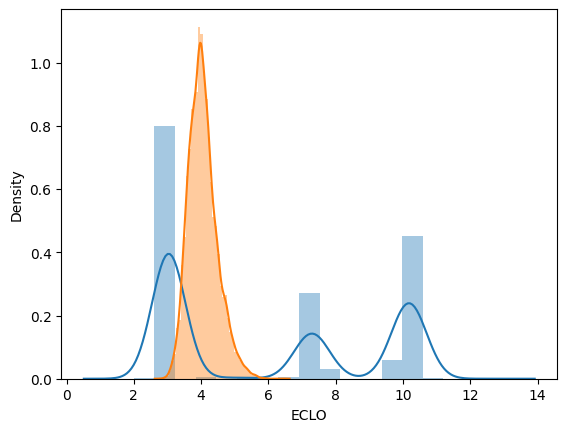

In [ ]:
y_pred = multi_predictor.predict(test_x)
totalECLO = 10*y_pred['사망자수'] +5*y_pred['중상자수'] + 3*y_pred['경상자수'] + y_pred['부상자수']
predECLO = y_pred['ECLO']
display(totalECLO == predECLO)
sns.distplot(totalECLO)
sns.distplot(predECLO)
display(totalECLO.describe(),predECLO.describe())



In [ ]:
#ECLO에 대한 예측은 기존 4가지 예측이랑 비슷한 것 같음
#totalELCO는 봉이 3개가 됨, 최대값은 조금 줄었네

In [ ]:
display(totalECLO, predECLO)

0        10.286910
1        10.040219
2         7.189206
3         3.042533
4        10.269201
           ...    
10958     9.783167
10959     7.040205
10960     7.323733
10961     7.061518
10962     7.090308
Length: 10963, dtype: float32

0        4.326262
1        4.140449
2        4.607062
3        3.830654
4        4.620461
           ...   
10958    4.030187
10959    4.078859
10960    4.431735
10961    4.250379
10962    4.400355
Name: ECLO, Length: 10963, dtype: float32

In [ ]:
auto_7_ECLO_reverse_multi_submission = sample_submission.copy()
auto_7_ECLO_reverse_multi_submission['ECLO'] = totalECLO
auto_7_ECLO_reverse_multi_submission.to_csv('auto_7_ECLO_reverse_multi_submit.csv', index=False)


In [ ]:
# 7_multilabel_ECLO_reverse
# 모델 학습 순서가 성능에 영향을 줄까?
# ECLO도 넣고 학습하면? 후학습
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = pd.concat([train_x, train_df['사망자수'], train_df['중상자수'],
                        train_df['경상자수'], train_df['부상자수'], train_df['ECLO']], axis = 1)

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

ag_scorer = make_scorer(name='rmsle',
  score_func=rmsle,
  optimum=0,
  greater_is_better=False)

labels = ['부상자수', '경상자수', '중상자수', '사망자수','ECLO']
problem_types = ['regression','regression', 'regression', 'regression', 'regression']
eval_metrics = [ag_scorer,ag_scorer,ag_scorer, ag_scorer,ag_scorer]

multi_predictor = MultilabelPredictor(labels=labels, problem_types=problem_types, eval_metrics=eval_metrics)
multi_predictor.fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20231208_135223"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231208_135223Predictor_부상자수"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
CPU

Fitting TabularPredictor for label: 부상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3']
		('int', [])    : 4 | ['연', '월', '일', '시간']
		('object', []) : 8 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []) : 8 | ['요일'

Fitting TabularPredictor for label: 경상자수 ...


	Train Data (Original)  Memory Usage: 36.35 MB (0.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구

Fitting TabularPredictor for label: 중상자수 ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3']
		('int', [])    : 6 | ['연', '월', '일', '시간', '경상자수', ...]
		('object', []) : 8 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []

Fitting TabularPredictor for label: 사망자수 ...


	Train Data (Original)  Memory Usage: 36.96 MB (0.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구

Fitting TabularPredictor for label: ECLO ...


	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 1): ['도시']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 5 | ['설치개수', 'child_area_count', '급지구분_1', '급지구분_2', '급지구분_3']
		('int', [])    : 8 | ['연', '월', '일', '시간', '사망자수', ...]
		('object', []) : 8 | ['요일', '기상상태', '노면상태', '사고유형', '구', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('category', []

[1000]	valid_set's l2: 0.061693	valid_set's rmsle: -0.0134278
[2000]	valid_set's l2: 0.0552386	valid_set's rmsle: -0.0122219
[3000]	valid_set's l2: 0.0503301	valid_set's rmsle: -0.011222


	-0.0183	 = Validation score   (-rmsle)
	18.2s	 = Training   runtime
	1.24s	 = Validation runtime
Fitting model: LightGBM ...
	-0.0136	 = Validation score   (-rmsle)
	1.93s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0102	 = Validation score   (-rmsle)
	19.59s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0053	 = Validation score   (-rmsle)
	253.49s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0082	 = Validation score   (-rmsle)
	8.37s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
Metric rmsle is not supported by this model - using mean_squared_error instead
	-0.034	 = Validation score   (-rmsle)
	68.78s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0091	 = Validation score   (-rmsle)
	6.26s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.1356	 = 

MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('AutogluonModels/ag-20231208_135223')


Predicting with TabularPredictor for label: 부상자수 ...
Predicting with TabularPredictor for label: 경상자수 ...
Predicting with TabularPredictor for label: 중상자수 ...
Predicting with TabularPredictor for label: 사망자수 ...
Predicting with TabularPredictor for label: ECLO ...


0        False
1        False
2        False
3        False
4        False
         ...  
10958    False
10959    False
10960    False
10961    False
10962    False
Length: 10963, dtype: bool

<ipython-input-89-b63ae467bab0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(totalECLO)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-89-b63ae467bab0>:6: UserW

count    10963.000000
mean         6.898803
std          5.104189
min          3.341635
25%          3.952307
50%          4.164357
75%          4.733959
max         17.977541
dtype: float64

count    10963.000000
mean         2.713238
std          0.669061
min          1.660191
25%          2.998508
50%          3.001752
75%          3.002539
max         10.123127
Name: ECLO, dtype: float64

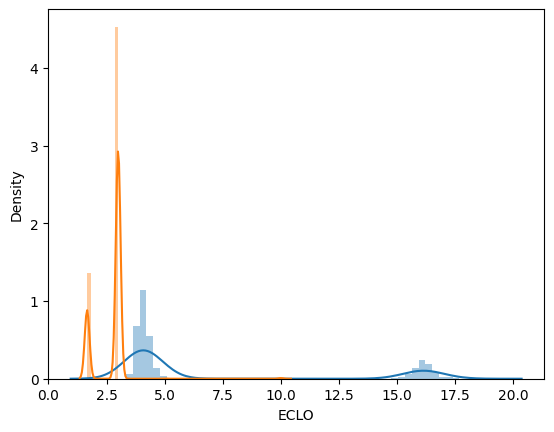

In [ ]:
y_pred = multi_predictor.predict(test_x)
totalECLO = 10*y_pred['사망자수'] +5*y_pred['중상자수'] + 3*y_pred['경상자수'] + y_pred['부상자수']
predECLO = y_pred['ECLO']
display(totalECLO == predECLO)
sns.distplot(totalECLO)
sns.distplot(predECLO)
display(totalECLO.describe(),predECLO.describe())


In [ ]:
auto_7_reverse_multi_ECLO_submission = sample_submission.copy()
auto_7_reverse_multi_ECLO_submission['ECLO'] = totalECLO
auto_7_reverse_multi_ECLO_submission.to_csv('auto_7_reverse_multi_ECLO_submit.csv', index=False)

# Modeling(TabNet)

In [82]:
# 범주형 변수 확인
print(categorical_features)
categorical_dims = {}
for i in categorical_features:
    categorical_dims[i] = train_x[i].nunique()

features = [ col for col in train_xy.columns if col not in ['ECLO']]

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_features]

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_features]

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2', 'time_cat']


In [83]:
label_encoding(train_x)

,요일,기상상태,노면상태,사고유형,연,월,일,도시,구,동,도로형태1,도로형태2,time_cat,설치개수,child_area_count,급지구분_1,급지구분_2,급지구분_3,accident_count,사고건수,사망,중상,경상,부상,단속구분_1,단속구분_2,단속구분_4,단속구분_99,2021년05월_총인구수,정원,장애인보호시설개수,응급의료센터개수,지구대파출소개수,경로당개수,입소정원,요양시설개수
0,6,2,0,0,2019,1,1,0,7,40,2,5,0,391.0,2.0,11.0,0.0,0.0,2.0,8.0,2.0,3.0,3.0,0.0,0.0,1.0,4.0,0.0,75133,69,5,0.0,4,48,191,6
1,6,5,0,0,2019,1,1,0,1,4,2,5,0,932.0,0.0,0.0,1.0,3.0,4.0,19.0,1.0,6.0,9.0,4.0,1.0,3.0,8.0,0.0,552192,149,10,1.0,13,274,1216,38
2,6,2,0,0,2019,1,1,0,6,66,2,5,0,473.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
3,6,2,0,1,2019,1,1,0,4,79,2,5,0,597.0,11.0,0.0,9.0,5.0,1.0,3.0,0.0,2.0,1.0,0.0,2.0,8.0,0.0,0.0,437892,125,7,0.0,8,275,1843,61
4,6,2,0,1,2019,1,1,0,3,129,2,5,0,2058.0,0.0,0.0,1.0,0.0,2.0,10.0,0.0,3.0,7.0,0.0,2.0,10.0,0.0,0.0,341730,143,8,0.0,9,213,1451,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,0,2,0,1,2021,12,31,0,6,118,0,3,2,245.5,1.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,420820,132,8,0.0,7,247,481,16
39605,0,2,0,1,2021,12,31,0,1,103,2,5,2,843.0,0.0,0.0,0.0,5.0,1.0,3.0,0.0,0.0,2.0,1.0,4.0,11.0,12.0,3.0,552192,149,10,0.0,13,274,1216,38
39606,0,2,0,1,2021,12,31,0,1,144,0,3,0,164.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,13.0,0.0,552192,149,10,0.0,13,274,1216,38
39607,0,2,0,1,2021,12,31,0,1,158,1,5,0,210.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,552192,149,10,0.0,13,274,1216,38


In [84]:
train_xy = pd.concat([train_x,train_y],axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, shuffle=True)

clf = TabNetRegressor(cat_dims=cat_dims, cat_idxs=cat_idxs)

clf.fit(
  x_train.values, y_train.values.reshape(-1,1),
  eval_set=[(x_valid.values, y_valid.values.reshape(-1,1))],
  eval_metric=['rmsle']
)
#preds = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.81721| val_0_rmsle: 1.16271 |  0:00:03s
epoch 1  | loss: 10.2783 | val_0_rmsle: 0.47826 |  0:00:05s
epoch 2  | loss: 10.21802| val_0_rmsle: 0.48915 |  0:00:06s
epoch 3  | loss: 10.17392| val_0_rmsle: 0.47022 |  0:00:08s
epoch 4  | loss: 10.14128| val_0_rmsle: 0.47937 |  0:00:10s
epoch 5  | loss: 10.07623| val_0_rmsle: 0.46799 |  0:00:12s
epoch 6  | loss: 10.07358| val_0_rmsle: 0.48002 |  0:00:14s
epoch 7  | loss: 10.06693| val_0_rmsle: 0.47185 |  0:00:16s
epoch 8  | loss: 10.02382| val_0_rmsle: 0.46367 |  0:00:17s
epoch 9  | loss: 10.02244| val_0_rmsle: 0.46067 |  0:00:19s
epoch 10 | loss: 10.05374| val_0_rmsle: 0.47714 |  0:00:20s
epoch 11 | loss: 10.01853| val_0_rmsle: 0.46103 |  0:00:22s
epoch 12 | loss: 9.9919  | val_0_rmsle: 0.46216 |  0:00:24s
epoch 13 | loss: 10.02298| val_0_rmsle: 0.46348 |  0:00:27s
epoch 14 | loss: 10.00234| val_0_rmsle: 0.46081 |  0:00:28s
epoch 15 | loss: 10.01896| val_0_rmsle: 0.46372 |  0:00:30s
epoch 16 | loss: 10.00035| val_0_rmsle: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


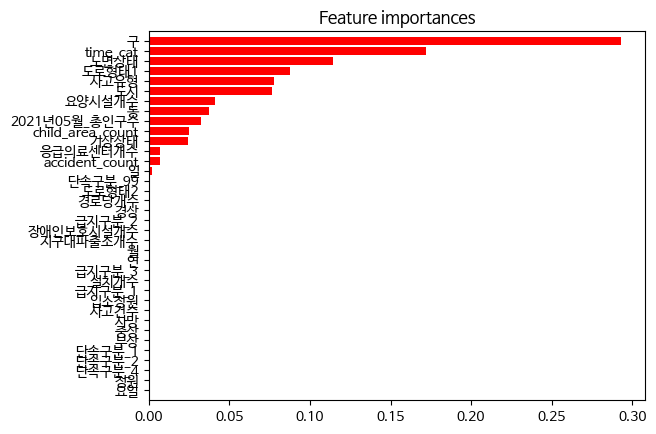

In [85]:
feat_importances = clf.feature_importances_
indices = np.argsort(feat_importances)
plt.figure()
plt.title("Feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices],
       color="r", align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(len(feat_importances)), [x_train.columns[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show()

# Submission

In [ ]:
auto_11_submission = sample_submission.copy()
auto_11_submission['ECLO'] = totalECLO
auto_11_submission.to_csv('auto_11_submit.csv', index=False)

In [ ]:
y_pred = predictor_ECLO.predict(test_x)
auto_7_acc_submission = sample_submission.copy()
auto_7_acc_submission['ECLO'] = y_pred
auto_7_acc_submission.to_csv('auto_7_acc_submit.csv', index=False)
y_pred

0        4.251110
1        3.662764
2        4.765426
3        3.690612
4        4.676516
           ...   
10958    4.062130
10959    3.939066
10960    3.920821
10961    4.362688
10962    4.032722
Name: ECLO, Length: 10963, dtype: float32

In [ ]:
y_pred = clf.predict(test_x.values)
auto_tab_submission = sample_submission.copy()
auto_tab_submission['ECLO'] = y_pred
auto_tab_submission.to_csv('auto_tab_submit.csv', index=False)
y_pred

array([[4.107546 ],
       [3.755296 ],
       [5.062343 ],
       ...,
       [4.3882074],
       [4.69005  ],
       [5.00205  ]], dtype=float32)